# TASK 1

In this task, I will do the following:

### 1. Visualization of HIV Case Trends in Countries Contributing to 75% of the Global Burden.

### 2. Visualization of HIV Case Trends in Countries Contributing to 75% of the Global Burden within Each WHO Region

### 3. Merge the HIV dataset with the provided World Bank data on the **Multidimensional Poverty Headcount Ratio**, which includes factors such as income, educational attainment, school enrollment, access to electricity, sanitation, and drinking water.

### 4. Analyze the relationship between the number of people living with HIV and **multidimensional poverty**, as well as the **individual factors** that contribute to the poverty ratio and Ensure the analysis accounts for **random effects** such as **country** and **year**.

### Importing necessary libraries

In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import geopandas as gpd

### HIV dataset cleaning

In [302]:
# reading HIV dataset
df = pd.read_csv('/content/HIV data 2000-2023.csv',  encoding='ISO-8859-1')
df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,Value
0,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2023,320 000 [280 000 - 380 000]
1,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2022,320 000 [280 000 - 380 000]
2,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2021,320 000 [280 000 - 380 000]
3,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2020,320 000 [280 000 - 370 000]
4,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2015,300 000 [260 000 - 350 000]


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   IndicatorCode        1552 non-null   object
 1   Indicator            1552 non-null   object
 2   ValueType            1552 non-null   object
 3   ParentLocationCode   1552 non-null   object
 4   ParentLocation       1552 non-null   object
 5   Location type        1552 non-null   object
 6   SpatialDimValueCode  1552 non-null   object
 7   Location             1552 non-null   object
 8   Period type          1552 non-null   object
 9   Period               1552 non-null   int64 
 10  Value                1552 non-null   object
dtypes: int64(1), object(10)
memory usage: 133.5+ KB


In [304]:
df['IndicatorCode'].unique()

array(['HIV_0000000001'], dtype=object)

In [305]:
df['Indicator'].unique()

array(['Estimated number of people (all ages) living with HIV'],
      dtype=object)

In [306]:
len(df['Location'].unique())

194

In [307]:
# Clean and extract numbers
df[['Estimate_central', 'Estimate_lower', 'Estimate_upper']] = (
    df['Value']
    .str.replace(r'\s+', '', regex=True)  # Remove all spaces
    .str.extract(r'(\d+)\[(\d+)-(\d+)\]')
    .astype(float)
)

df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,Value,Estimate_central,Estimate_lower,Estimate_upper
0,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2023,320 000 [280 000 - 380 000],320000.0,280000.0,380000.0
1,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2022,320 000 [280 000 - 380 000],320000.0,280000.0,380000.0
2,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2021,320 000 [280 000 - 380 000],320000.0,280000.0,380000.0
3,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2020,320 000 [280 000 - 370 000],320000.0,280000.0,370000.0
4,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2015,300 000 [260 000 - 350 000],300000.0,260000.0,350000.0


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IndicatorCode        1552 non-null   object 
 1   Indicator            1552 non-null   object 
 2   ValueType            1552 non-null   object 
 3   ParentLocationCode   1552 non-null   object 
 4   ParentLocation       1552 non-null   object 
 5   Location type        1552 non-null   object 
 6   SpatialDimValueCode  1552 non-null   object 
 7   Location             1552 non-null   object 
 8   Period type          1552 non-null   object 
 9   Period               1552 non-null   int64  
 10  Value                1552 non-null   object 
 11  Estimate_central     1065 non-null   float64
 12  Estimate_lower       1065 non-null   float64
 13  Estimate_upper       1065 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 169.9+ KB


In [309]:
# There are rows where the  country data is unavailable
df[df['Estimate_central'].isna()]

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,Value,Estimate_central,Estimate_lower,Estimate_upper
40,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,CAF,Central African Republic,Year,2023,No data,NaN,NaN,NaN
41,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,CAF,Central African Republic,Year,2022,No data,NaN,NaN,NaN
42,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,CAF,Central African Republic,Year,2021,No data,NaN,NaN,NaN
43,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,CAF,Central African Republic,Year,2020,No data,NaN,NaN,NaN
44,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,CAF,Central African Republic,Year,2015,No data,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,WPR,Western Pacific,Country,WSM,Samoa,Year,2020,No data,NaN,NaN,NaN
1548,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,WPR,Western Pacific,Country,WSM,Samoa,Year,2015,No data,NaN,NaN,NaN
1549,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,WPR,Western Pacific,Country,WSM,Samoa,Year,2010,No data,NaN,NaN,NaN
1550,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,WPR,Western Pacific,Country,WSM,Samoa,Year,2005,No data,NaN,NaN,NaN


In [310]:
#removing null rows
df = df.dropna(subset = ['Estimate_central'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1065 entries, 0 to 1535
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IndicatorCode        1065 non-null   object 
 1   Indicator            1065 non-null   object 
 2   ValueType            1065 non-null   object 
 3   ParentLocationCode   1065 non-null   object 
 4   ParentLocation       1065 non-null   object 
 5   Location type        1065 non-null   object 
 6   SpatialDimValueCode  1065 non-null   object 
 7   Location             1065 non-null   object 
 8   Period type          1065 non-null   object 
 9   Period               1065 non-null   int64  
 10  Value                1065 non-null   object 
 11  Estimate_central     1065 non-null   float64
 12  Estimate_lower       1065 non-null   float64
 13  Estimate_upper       1065 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 124.8+ KB


In [311]:
# Next i will check for situations where there are duplicate entries for a country in a recorded year
df[df.duplicated(subset=['Location', 'Period'], keep=False)]


,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,Value,Estimate_central,Estimate_lower,Estimate_upper


In [312]:
# Now we can go ahead with the analysis. i will use the latest year in the data(which is 2023)
# To get the top contributors
df_latest = df[df['Period'] == 2023]

In [313]:
df_latest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 0 to 1528
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IndicatorCode        139 non-null    object 
 1   Indicator            139 non-null    object 
 2   ValueType            139 non-null    object 
 3   ParentLocationCode   139 non-null    object 
 4   ParentLocation       139 non-null    object 
 5   Location type        139 non-null    object 
 6   SpatialDimValueCode  139 non-null    object 
 7   Location             139 non-null    object 
 8   Period type          139 non-null    object 
 9   Period               139 non-null    int64  
 10  Value                139 non-null    object 
 11  Estimate_central     139 non-null    float64
 12  Estimate_lower       139 non-null    float64
 13  Estimate_upper       139 non-null    float64
dtypes: float64(3), int64(1), object(10)
memory usage: 16.3+ KB


In [314]:
# To get the top 75% contributors:
# I will use the central estimates as my values.
# I will sort the countries in descending order based on the central estimates.
# I will create a new column that calculates the cumulative percentage sum relative to the total sum.

df_latest = df_latest.sort_values('Estimate_central',ascending = False)
df_latest['cumulative_contribution_%'] = df_latest['Estimate_central'].cumsum() / df_latest['Estimate_central'].sum() * 100


In [315]:
df_latest[df_latest['cumulative_contribution_%'] <= 80]

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,Value,Estimate_central,Estimate_lower,Estimate_upper,cumulative_contribution_%
352,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,ZAF,South Africa,Year,2023,7 700 000 [7 000 000 - 8 300 000],7700000.0,7000000.0,8300000.0,22.692337
1272,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,SEAR,South-East Asia,Country,IND,India,Year,2023,2 500 000 [2 200 000 - 3 000 000],2500000.0,2200000.0,3000000.0,30.059978
208,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,MOZ,Mozambique,Year,2023,2 400 000 [2 300 000 - 2 700 000],2400000.0,2300000.0,2700000.0,37.132915
256,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,NGA,Nigeria,Year,2023,2 000 000 [1 900 000 - 2 300 000],2000000.0,1900000.0,2300000.0,43.027028
336,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,TZA,United Republic of Tanzania,Year,2023,1 700 000 [1 600 000 - 1 900 000],1700000.0,1600000.0,1900000.0,48.037024
344,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,UGA,Uganda,Year,2023,1 500 000 [1 400 000 - 1 600 000],1500000.0,1400000.0,1600000.0,52.457610
168,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,KEN,Kenya,Year,2023,1 400 000 [1 300 000 - 1 600 000],1400000.0,1300000.0,1600000.0,56.583489
368,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,ZWE,Zimbabwe,Year,2023,1 300 000 [1 200 000 - 1 400 000],1300000.0,1200000.0,1400000.0,60.414663
360,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,ZMB,Zambia,Year,2023,1 300 000 [1 300 000 - 1 500 000],1300000.0,1300000.0,1500000.0,64.245836
416,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AMR,Americas,Country,BRA,Brazil,Year,2023,1 000 000 [930 000 - 1 100 000],1000000.0,930000.0,1100000.0,67.192893


In [316]:
# Since we don't have a cumulative_contribution_% value that is exactly 75%,
# I will round the cumulative_contribution_% to the nearest whole number.
# In this case, the nearest value is 75.26789.

df_latest['cumulative_contribution_%'] = df_latest['cumulative_contribution_%'].apply(lambda x: round(x) if pd.notna(x) else x)

In [317]:
# Here are the top countries that contribute 75% to the global burden
df_latest[df_latest['cumulative_contribution_%'] <= 75]['Location']

,Location
352,South Africa
1272,India
208,Mozambique
256,Nigeria
336,United Republic of Tanzania
344,Uganda
168,Kenya
368,Zimbabwe
360,Zambia
416,Brazil


In [318]:
# creating a list of these countries to help me filter them for the time series analysis
top_75_countries = list(df_latest[df_latest['cumulative_contribution_%'] <= 75]['Location'].unique())

In [319]:
# creating a dataframe of only these countries
time_series_df = df[df['Location'].isin(top_75_countries)]
time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 112 to 1327
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IndicatorCode        105 non-null    object 
 1   Indicator            105 non-null    object 
 2   ValueType            105 non-null    object 
 3   ParentLocationCode   105 non-null    object 
 4   ParentLocation       105 non-null    object 
 5   Location type        105 non-null    object 
 6   SpatialDimValueCode  105 non-null    object 
 7   Location             105 non-null    object 
 8   Period type          105 non-null    object 
 9   Period               105 non-null    int64  
 10  Value                105 non-null    object 
 11  Estimate_central     105 non-null    float64
 12  Estimate_lower       105 non-null    float64
 13  Estimate_upper       105 non-null    float64
dtypes: float64(3), int64(1), object(10)
memory usage: 12.3+ KB


In [320]:
# Based on this data, I will plot trends for each of the top countries
# But first I will have to check the years available in each of these countries then plot
def check_available_years(df, country_name):
    """This function checks the available years of data for a given country.

    Parameters:
    df (DataFrame): The input dataset containing HIV data.
    country_name (str): The name of the country to check.

    Returns:
    list: A sorted list of years for which data is available for the specified country."""
    country_data = df[df['Location'] == country_name]
    years = sorted(country_data['Period'].unique())
    full_range = list(range(min(years), max(years) + 1))

    print(f"Years available for {country_name}:\n {years}")
    return years


In [321]:
def human_format(num):
    """
    Converts a large number into a human-readable format with units (K for thousand, M for million, B for billion).

    Parameters:
    num (float or int): The number to be converted.

    Returns:
    str: The number formatted with the appropriate unit (e.g., 1K, 1.5M, 2B)."""
    for unit in ['', 'K', 'M', 'B']:
        if abs(num) < 1000:
            return f"{num:.0f}{unit}"
        num /= 1000
    return f"{num:.1f}B"

In [322]:
def plot_regular_segments(df, country_name, interval=1):
    """
    Plots the HIV trend for a given country,
    showing regular intervals of HIV data with the option to define the interval (in years).

    Parameters:
    df (DataFrame): The dataset containing HIV data.
    country_name (str): The country for which to plot the HIV trend.
    interval (int, optional): The number of years between each plotted segment. Defaults to 1 year.

    Returns:
    None: Displays the plot of the HIV trend for the given country.
    """
    country_data = df[df['Location'] == country_name].sort_values('Period')
    years = country_data['Period'].values
    central = country_data['Estimate_central'].values
    low = country_data['Estimate_lower'].values
    high = country_data['Estimate_upper'].values

    plt.figure(figsize=(12, 6))
    plt.title(f'HIV Trend for {country_name} (Regular Intervals: Every {interval} year(s))')
    plt.xlabel('Year')
    plt.ylabel('Estimated HIV Cases')

    # Track each valid segment
    seg_years = []
    seg_central = []
    seg_low = []
    seg_high = []

    for i in range(len(years)):
        if i == 0 or years[i] - years[i - 1] == interval:
            seg_years.append(years[i])
            seg_central.append(central[i])
            seg_low.append(low[i])
            seg_high.append(high[i])
        else:
            # Plot the previous segment
            if len(seg_years) > 1:
                plt.plot(seg_years, seg_central, marker='o', ms = 15,linewidth = 2,
                         markerfacecolor = "black",markeredgewidth = 4,markeredgecolor = "Orange",color = 'Orange',
                         linestyle='-', label=f"{seg_years[0]}–{seg_years[-1]}")
                plt.fill_between(seg_years, seg_low, seg_high, alpha=0.2)
            # Reset
            seg_years = [years[i]]
            seg_central = [central[i]]
            seg_low = [low[i]]
            seg_high = [high[i]]

    # Plot last segment
    if len(seg_years) > 1:
        plt.plot(seg_years, seg_central, marker='o', ms = 15,linewidth = 2,
                 markerfacecolor = "brown",markeredgewidth = 4,markeredgecolor = "Orange",color = 'Orange',
                 linestyle='-', label=f"{seg_years[0]}–{seg_years[-1]}")
        plt.fill_between(seg_years, seg_low, seg_high, alpha=0.2)

    plt.grid(True)
    plt.legend()

    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: human_format(x)))

    plt.tight_layout()
    plt.show()


In [323]:
# Checking each countries available yearly data
for country in top_75_countries:
    check_available_years(time_series_df, country)

Years available for South Africa:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for India:
 [np.int64(2023)]
Years available for Mozambique:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Nigeria:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for United Republic of Tanzania:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Uganda:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Kenya:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64

### Data visualization on HIV cases trends from countries contributing top 75% to the global burden

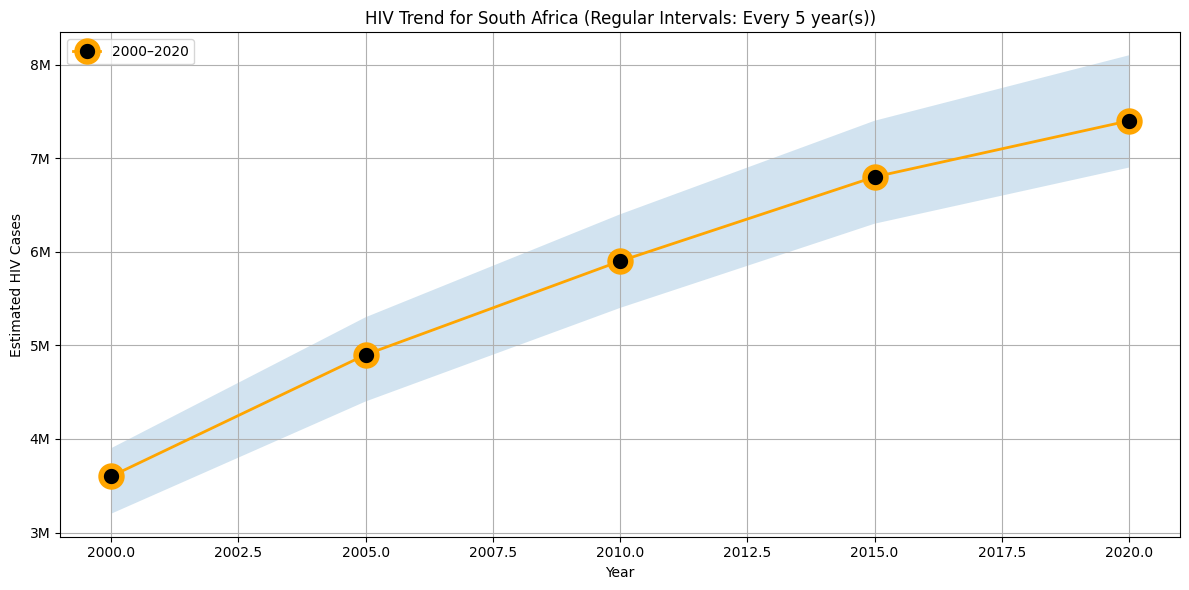

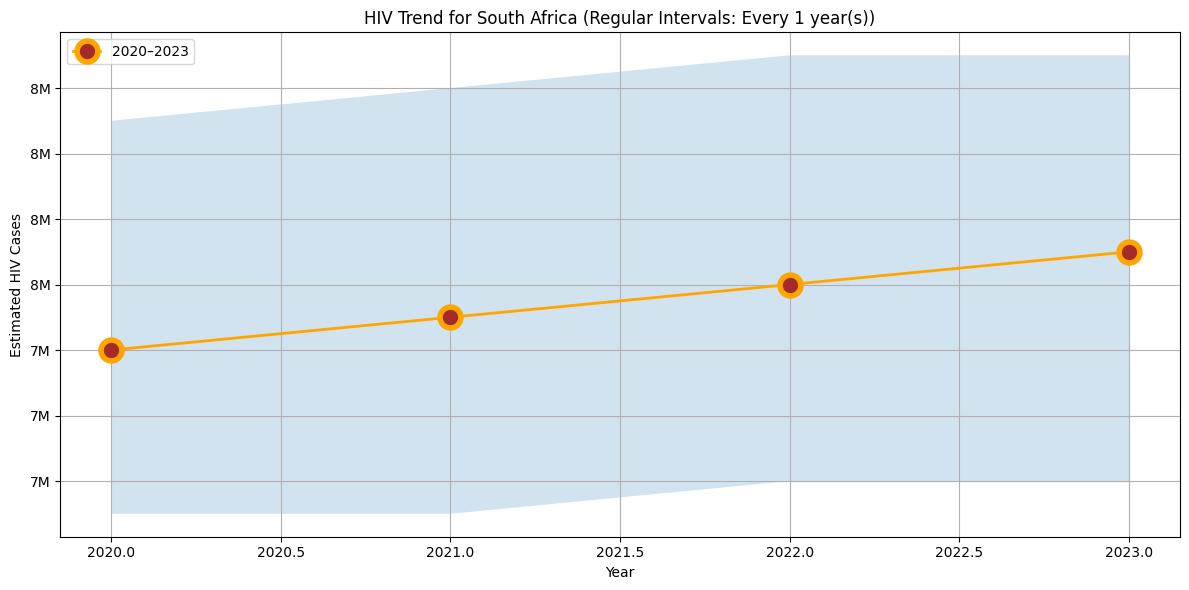

In [324]:
# Starting with south africa. I notice 5 year intervals and also 1 year intervals.
# I will plot two different plots
# for the 5 year interval
plot_regular_segments(time_series_df, 'South Africa', interval=5)
# For the current 1 year interval
plot_regular_segments(time_series_df, 'South Africa', interval=1)

HIV cases in South Africa have shown a steady increase from 2000 to 2020, based on 5-year intervals. A closer look at yearly data from 2020 to 2023 also reveals a continued upward trend

In [325]:
# india has only one data point available, which is 2023
time_series_df[time_series_df['Location'] == 'India'][['Location','Estimate_central','Estimate_lower','Estimate_upper']]

,Location,Estimate_central,Estimate_lower,Estimate_upper
1272,India,2500000.0,2200000.0,3000000.0


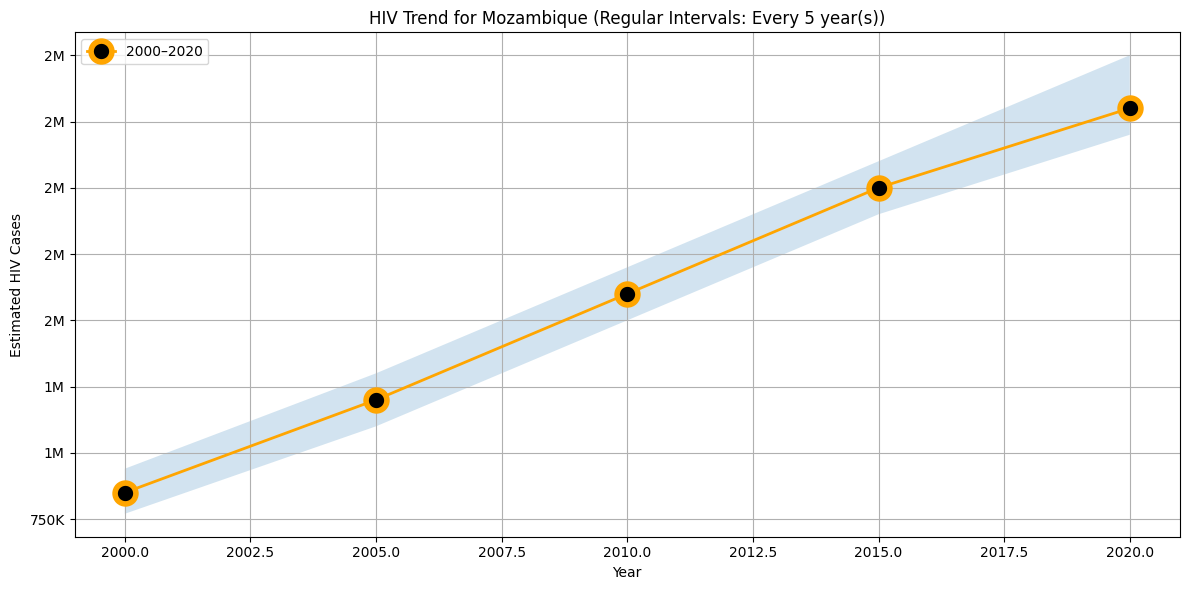

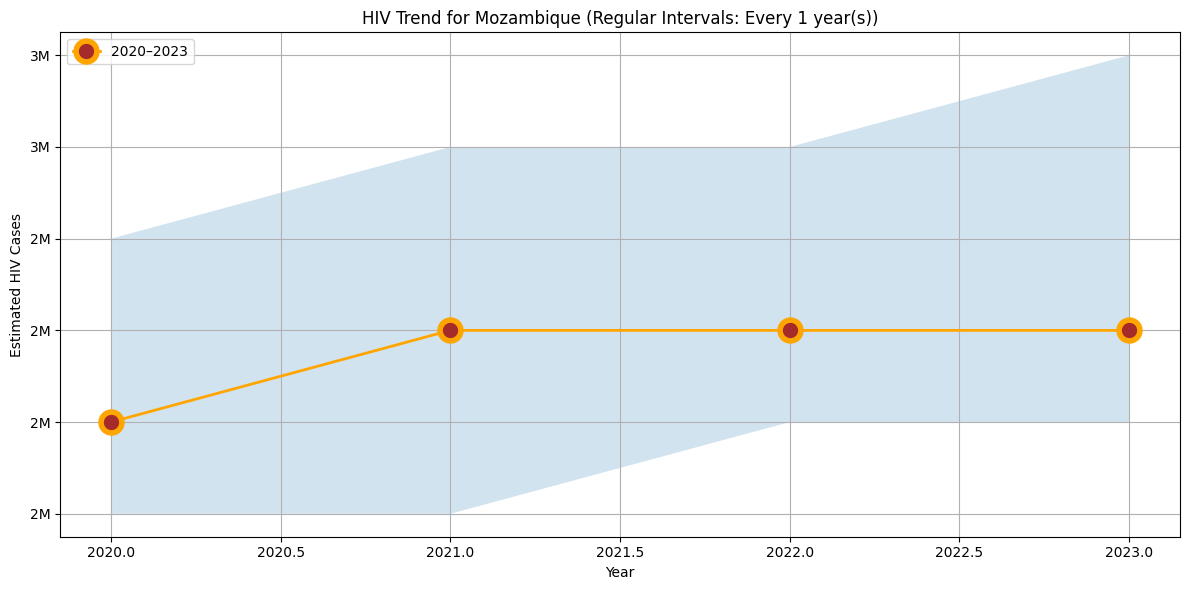

In [326]:
# Onto Mozambique, which also has same intervals as South Africa
# for the 5 year interval
plot_regular_segments(time_series_df, 'Mozambique', interval=5)
# For the current 1 year interval
plot_regular_segments(time_series_df, 'Mozambique', interval=1)

Mozambique experienced a steady increase in HIV cases from 2000 to 2020 in 5-year intervals. From 2020 to 2021, there was a noticeable rise, followed by a plateau through 2023.

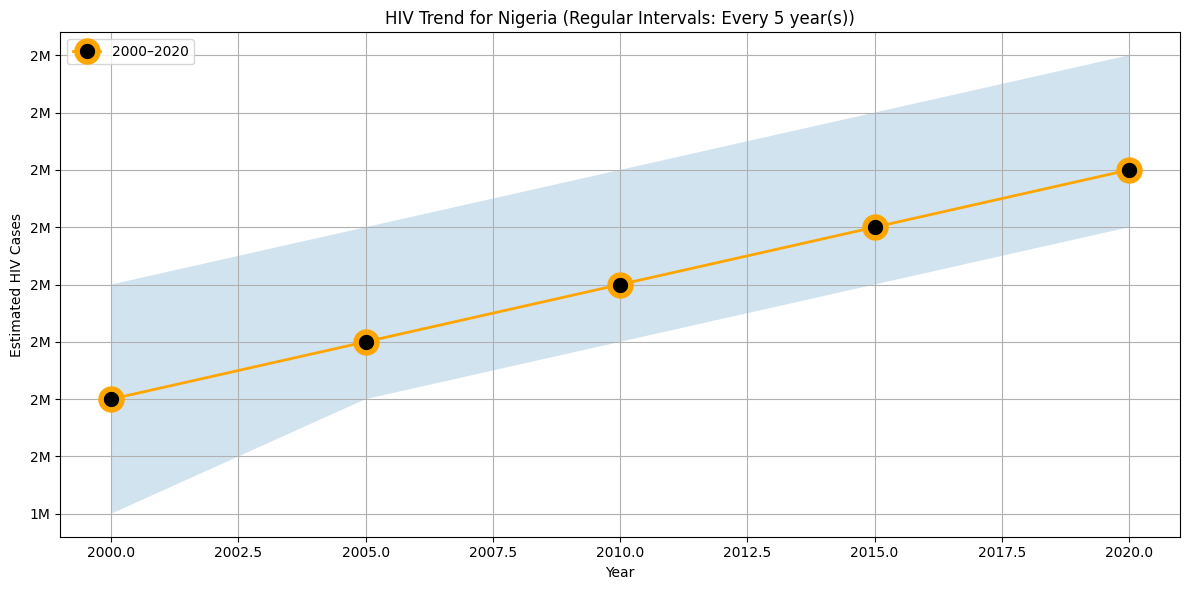

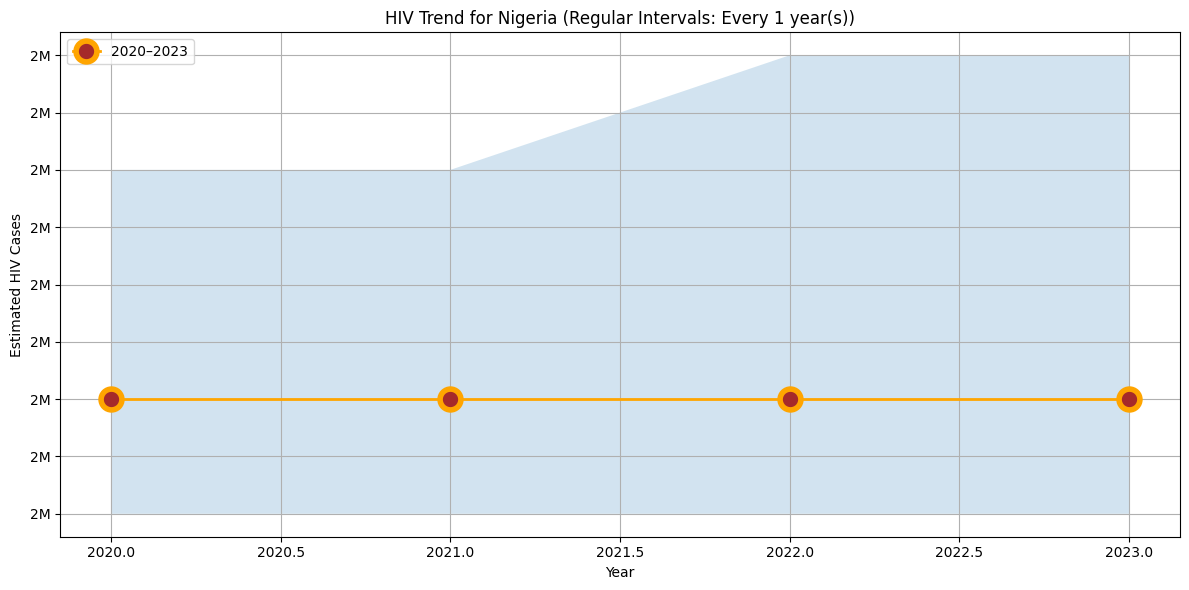

In [327]:
#Same to Nigeria
# for the 5 year interval
plot_regular_segments(time_series_df, 'Nigeria', interval=5)
# For the current 1 year interval
plot_regular_segments(time_series_df, 'Nigeria', interval=1)

Nigeria saw a steady rise in HIV cases between 2000 and 2020 in 5-year intervals. From 2020 to 2023, the numbers remained relatively constant.

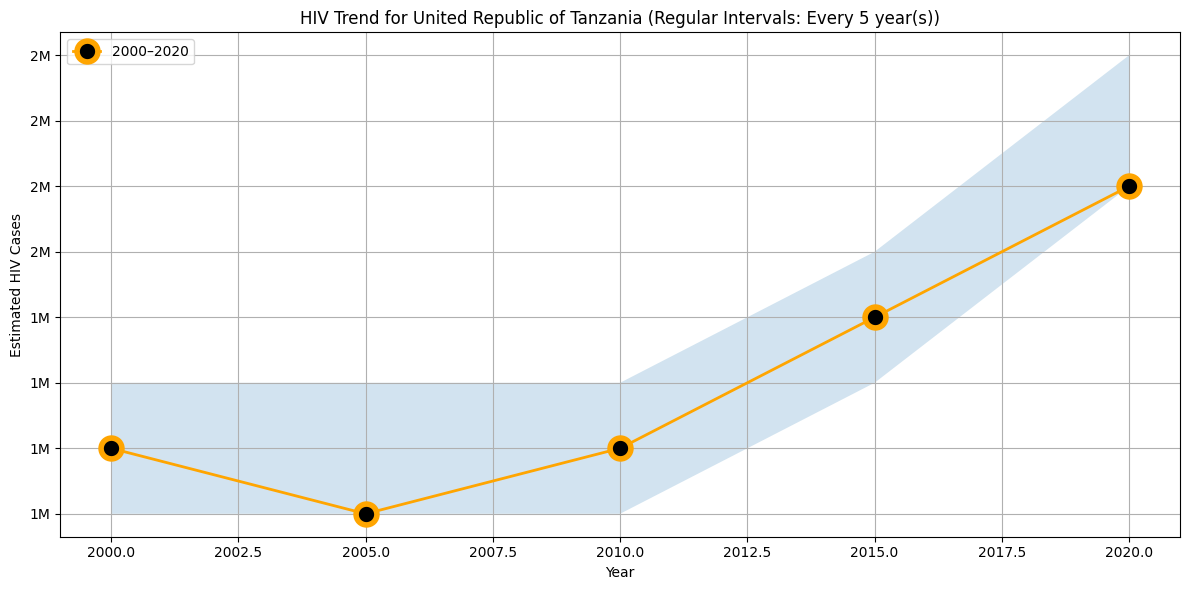

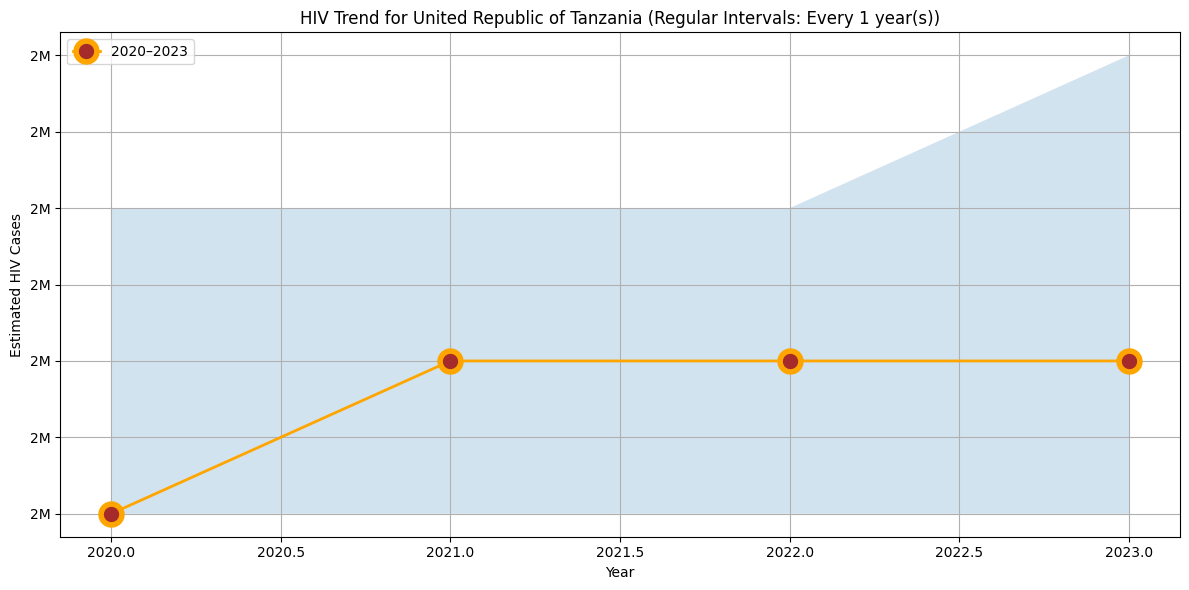

In [328]:
#Next Tanzania
# for the 5 year interval
plot_regular_segments(time_series_df, 'United Republic of Tanzania', interval=5)
# For the current 1 year interval
plot_regular_segments(time_series_df, 'United Republic of Tanzania', interval=1)

In Tanzania, HIV cases declined between 2000 and 2005, followed by a steady rise through 2020 based on 5-year intervals. From 2020 to 2021, there was an increase, after which the trend leveled off through 2023.

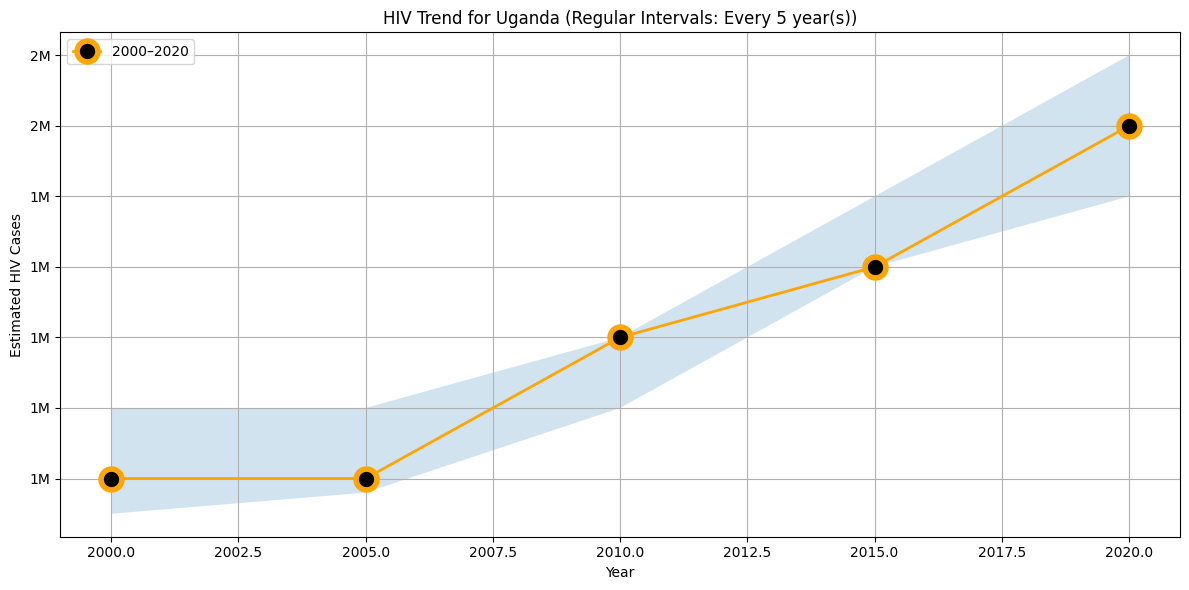

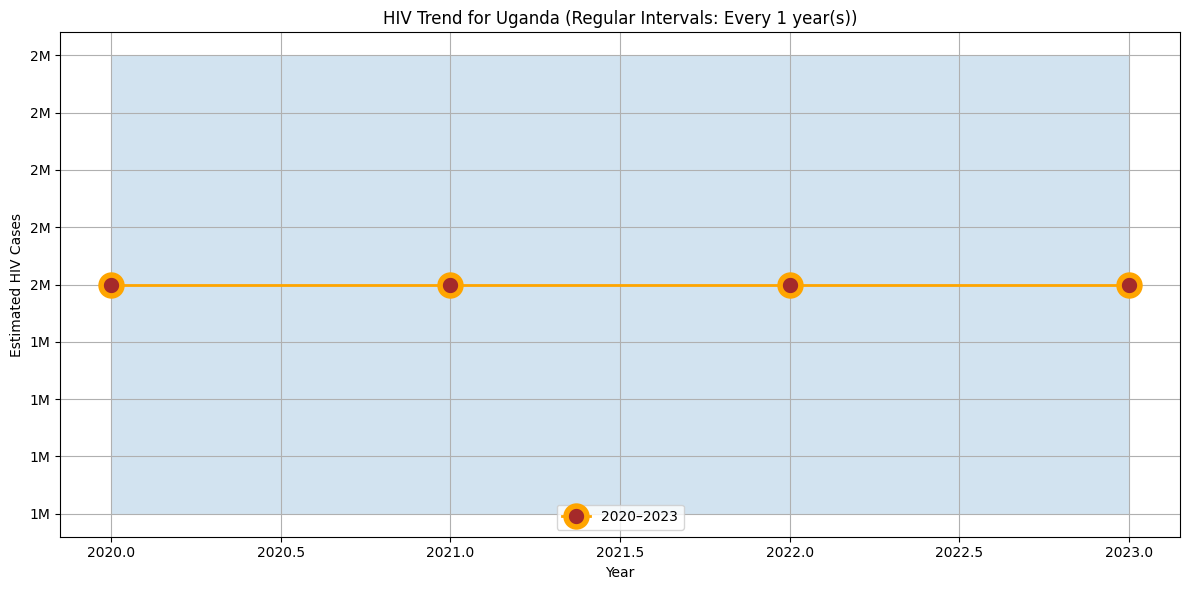

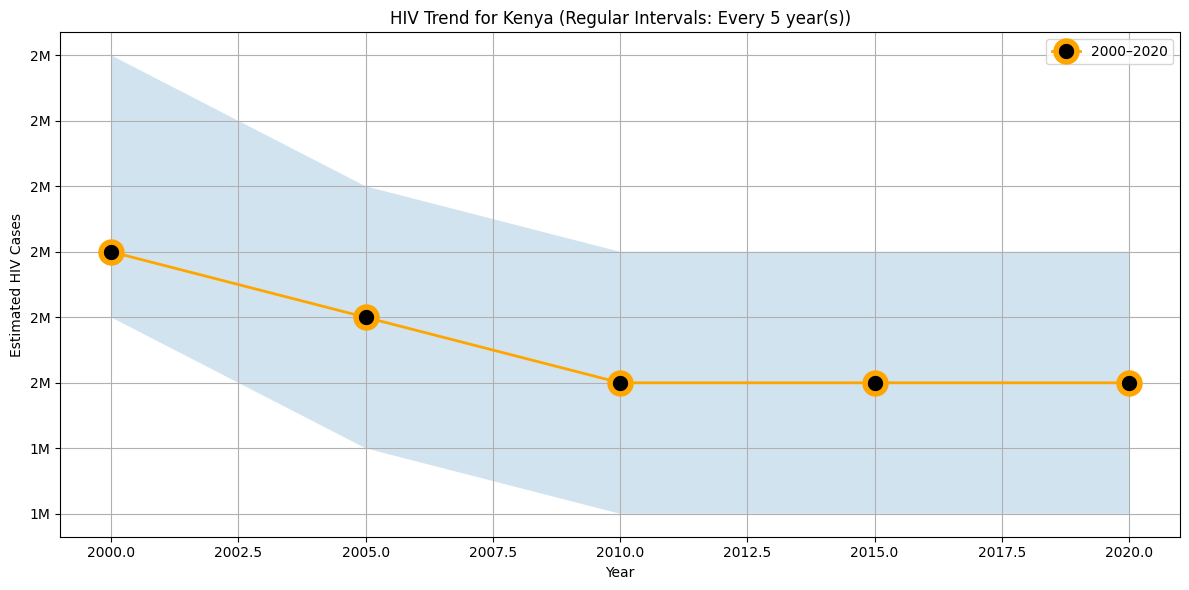

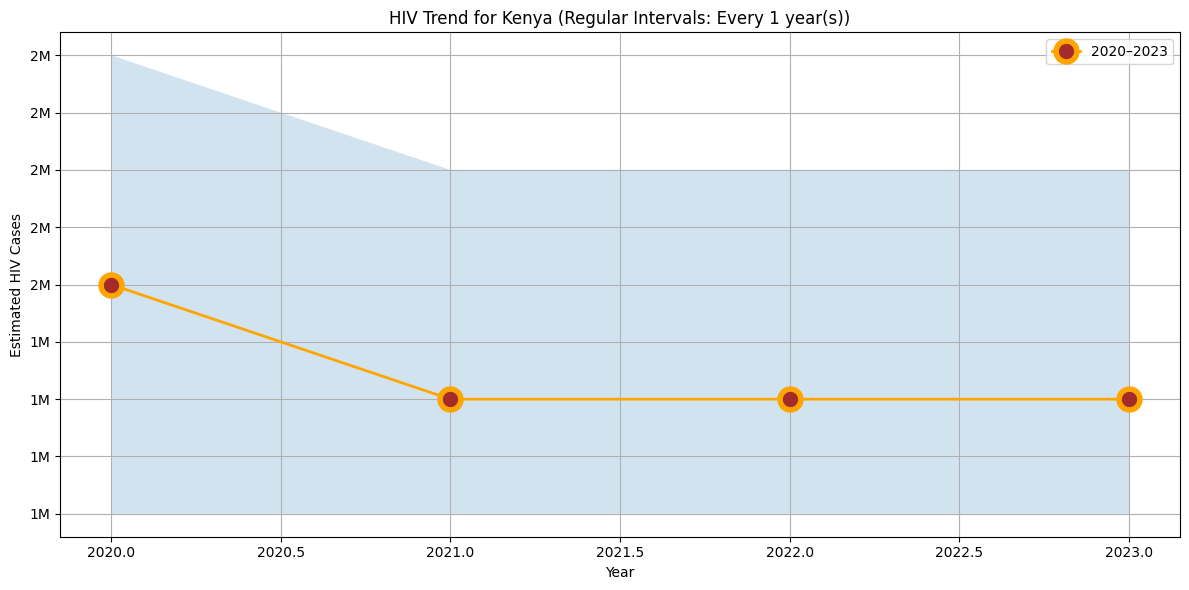

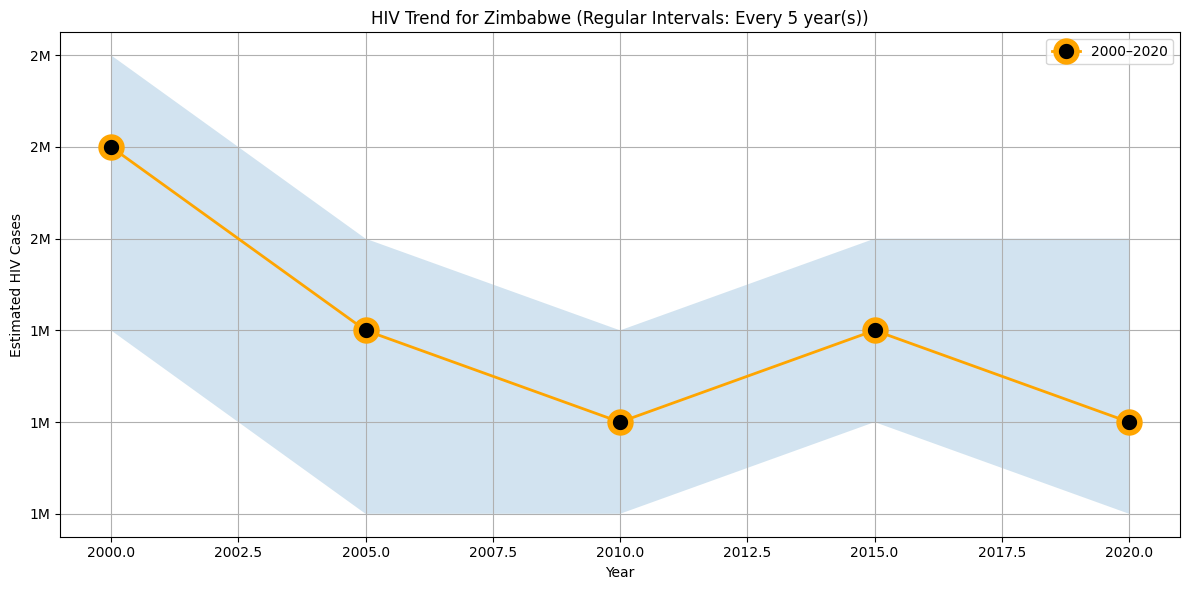

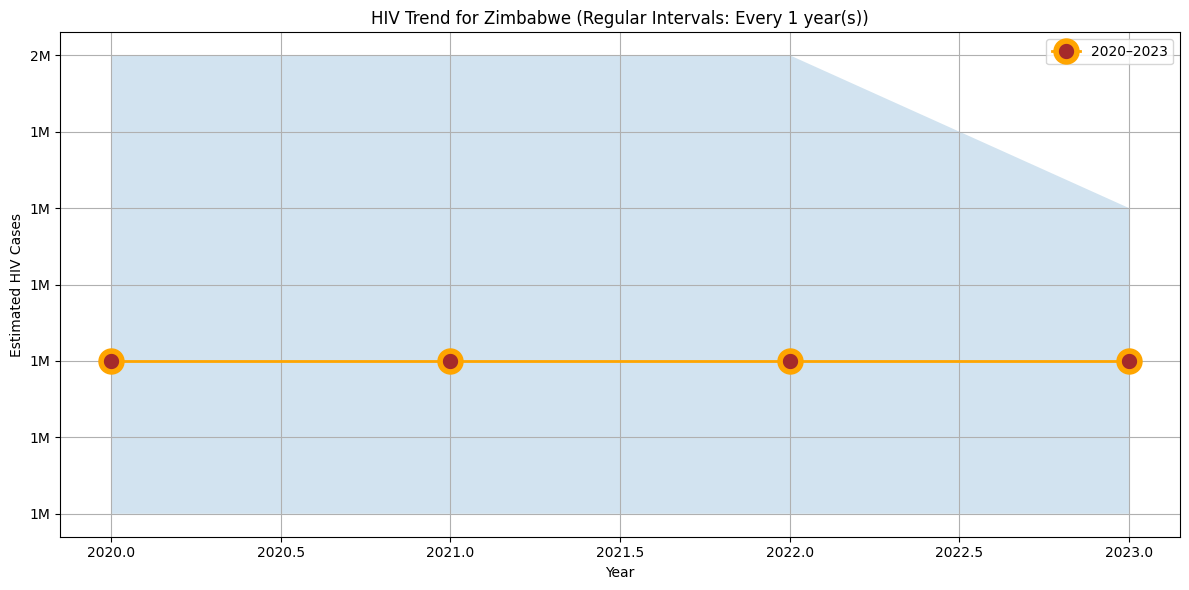

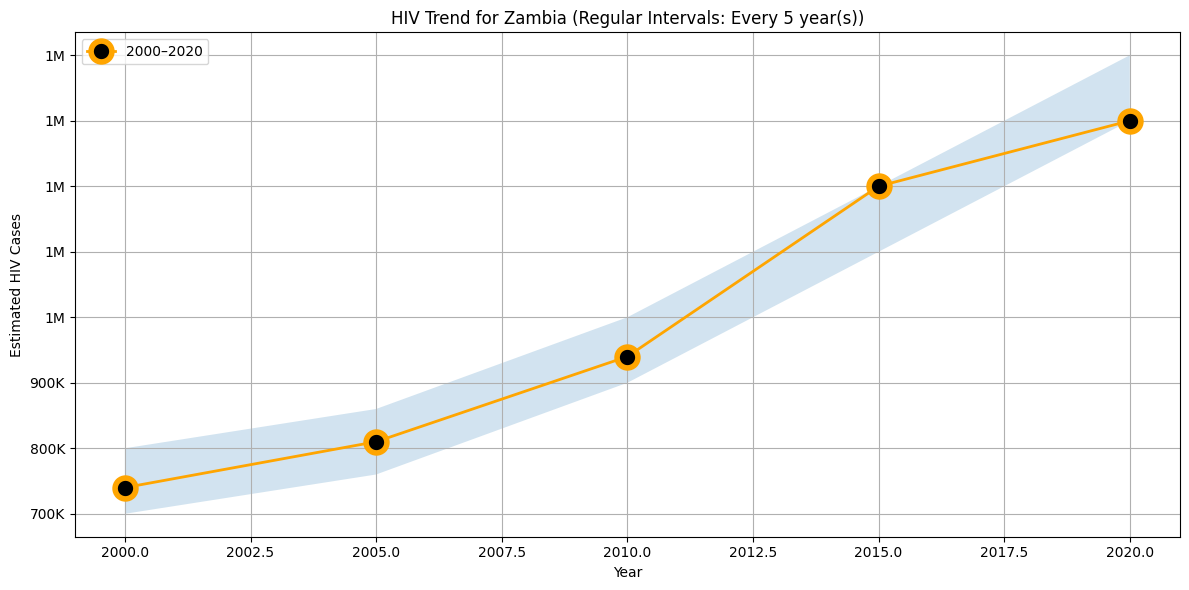

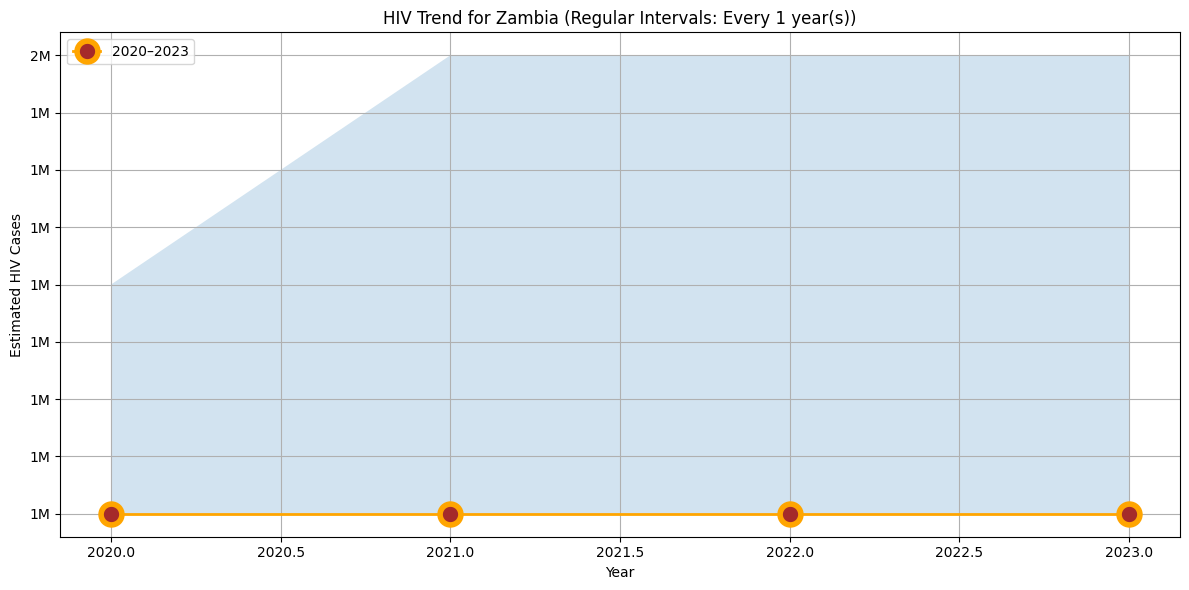

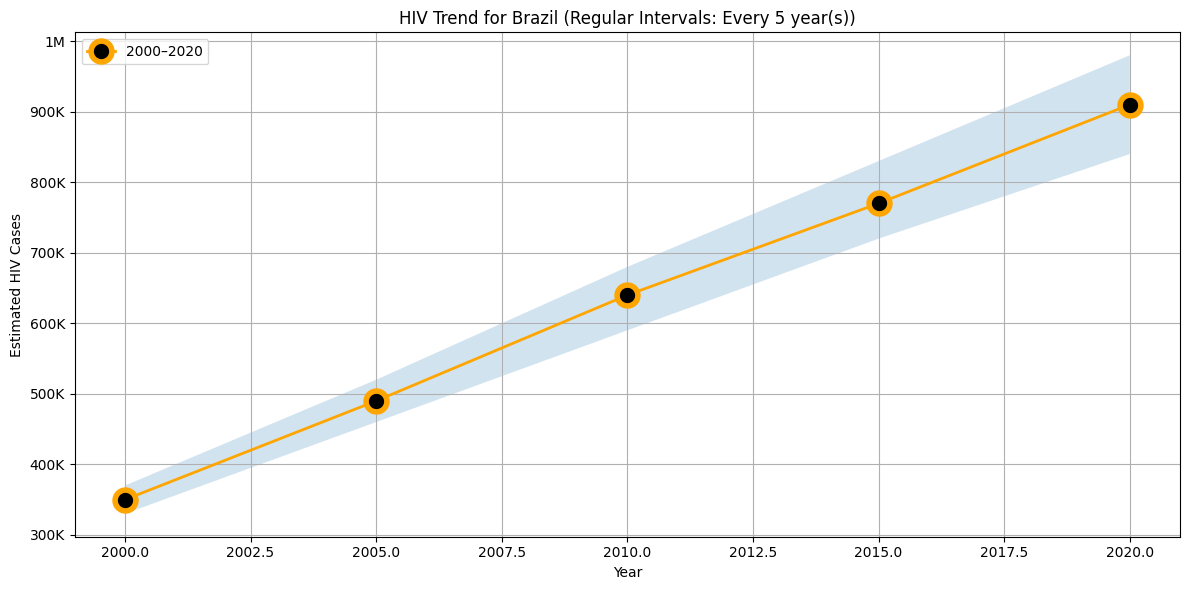

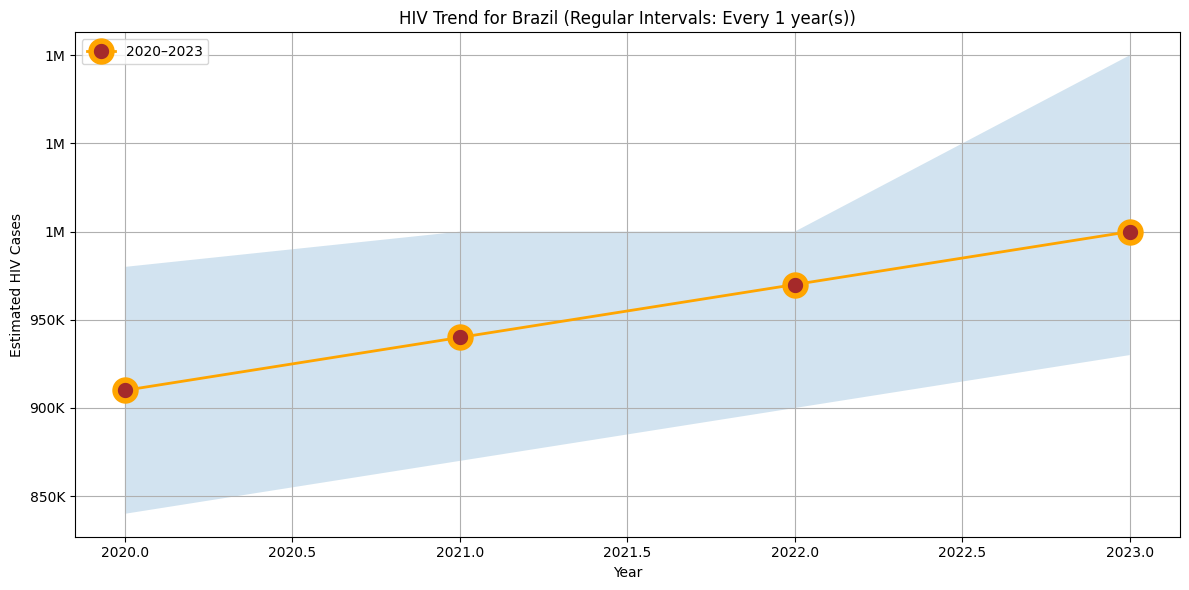

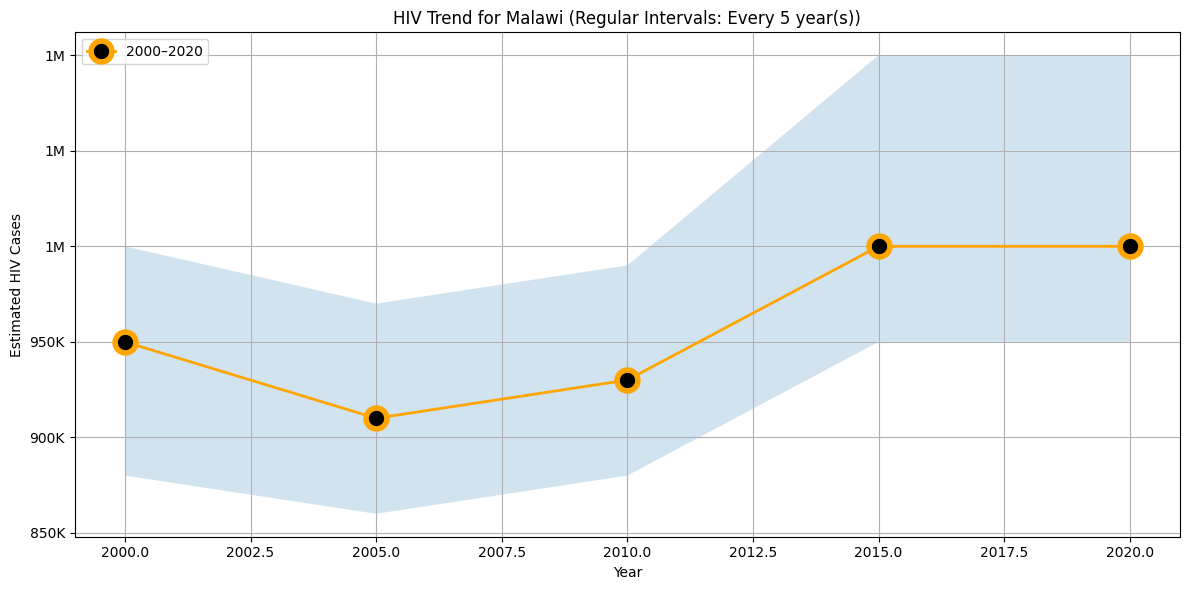

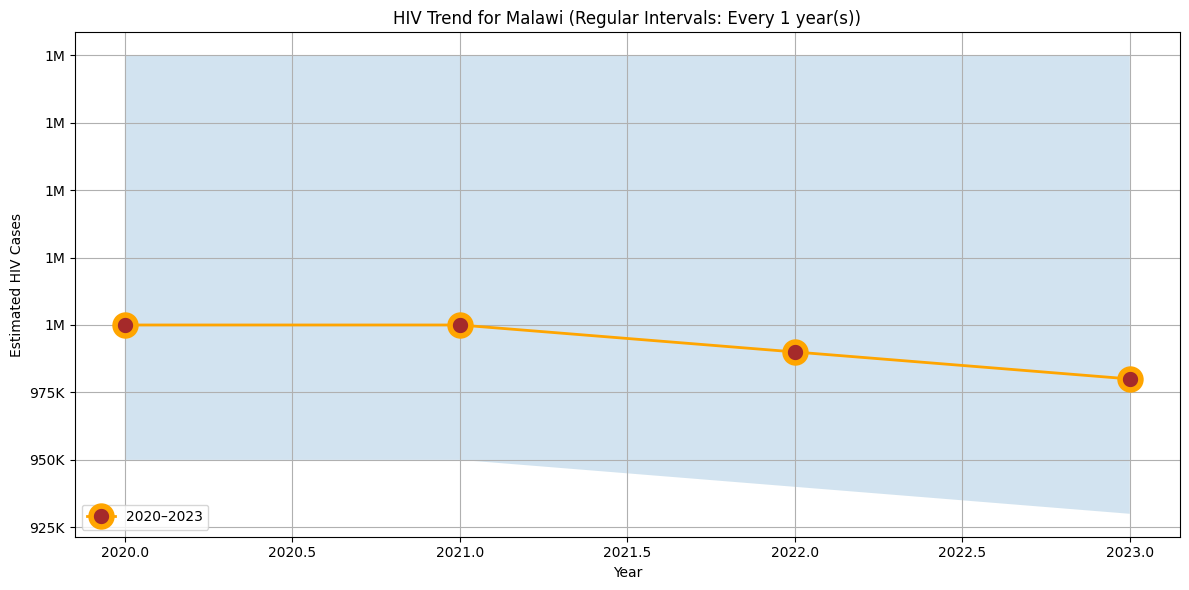

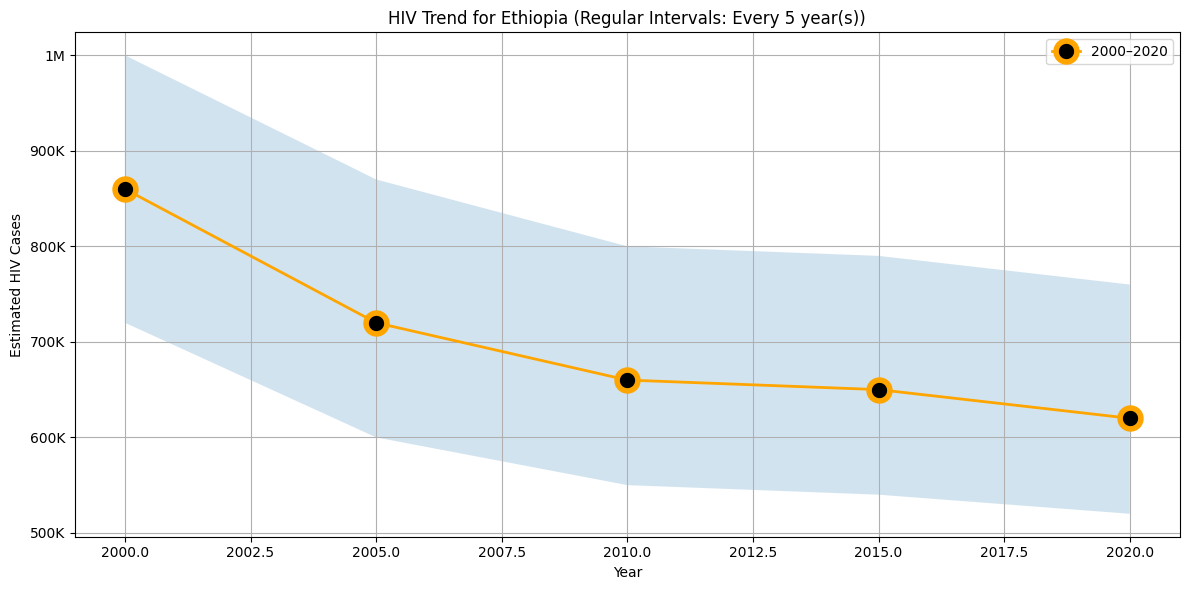

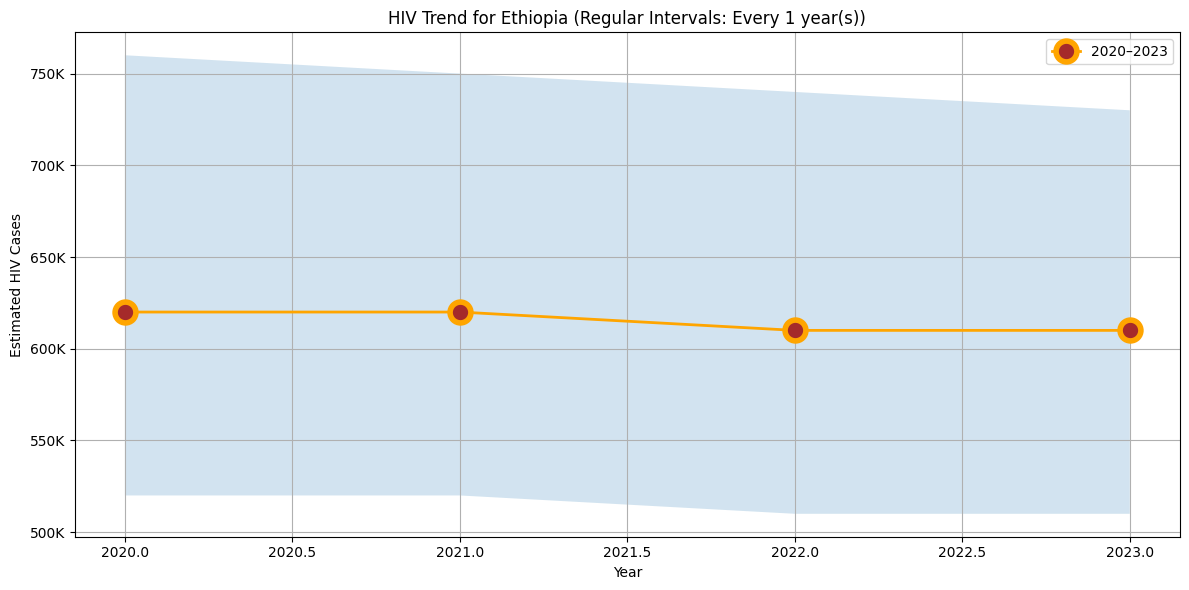

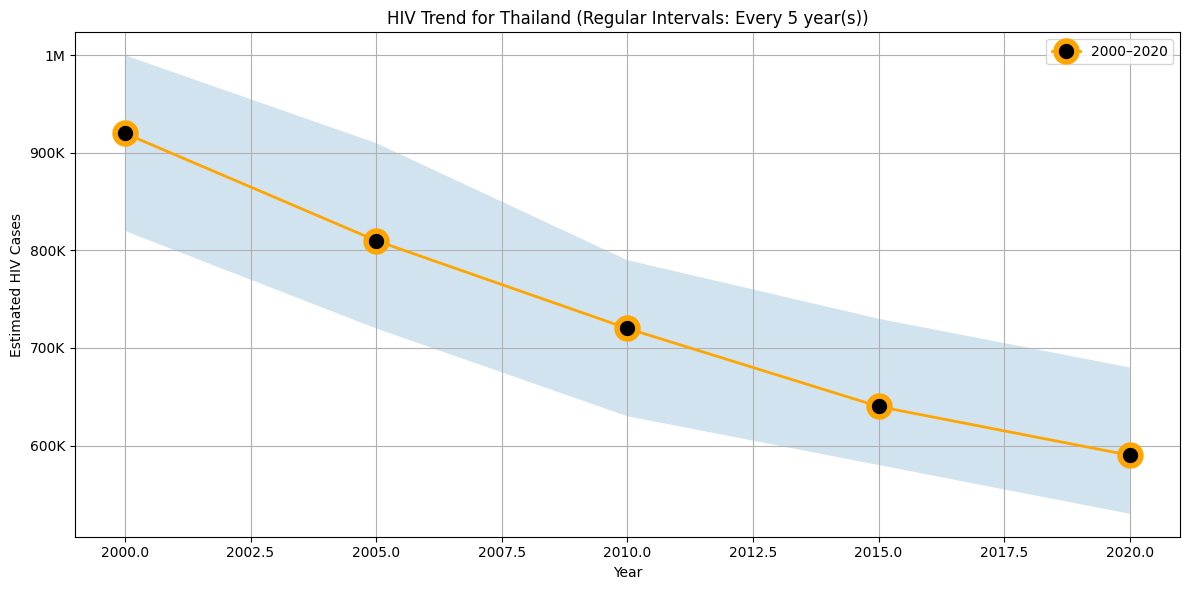

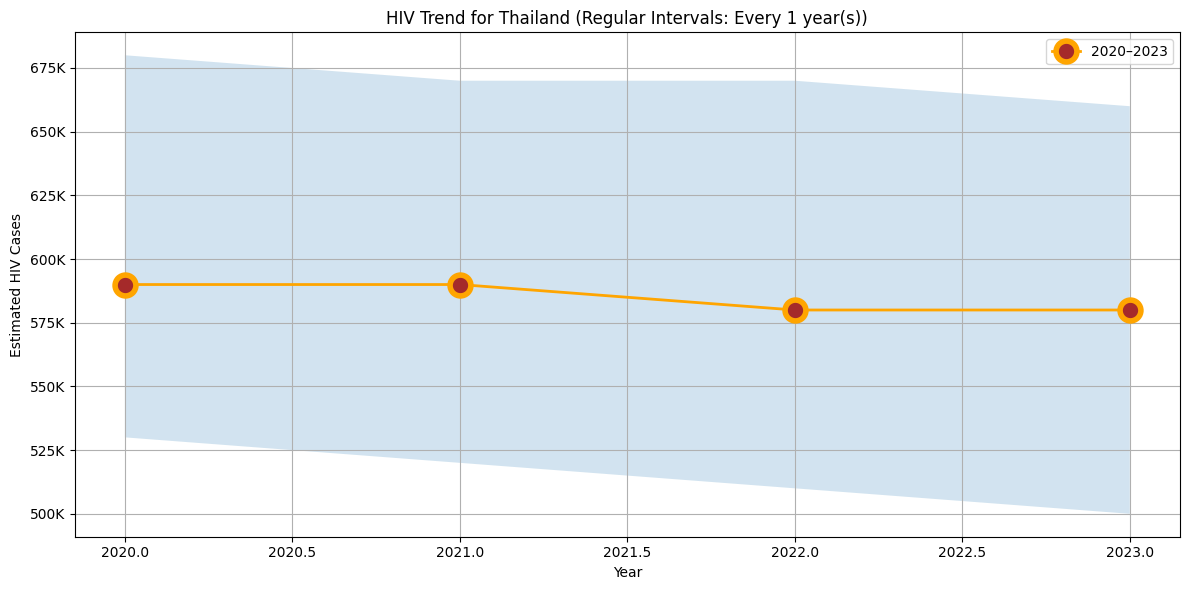

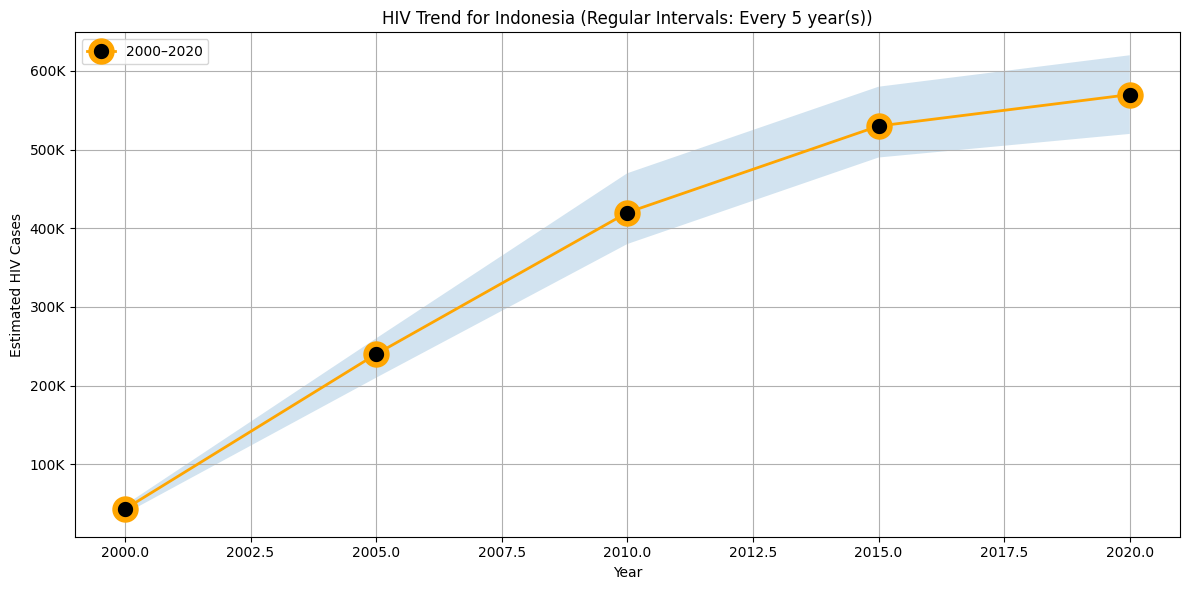

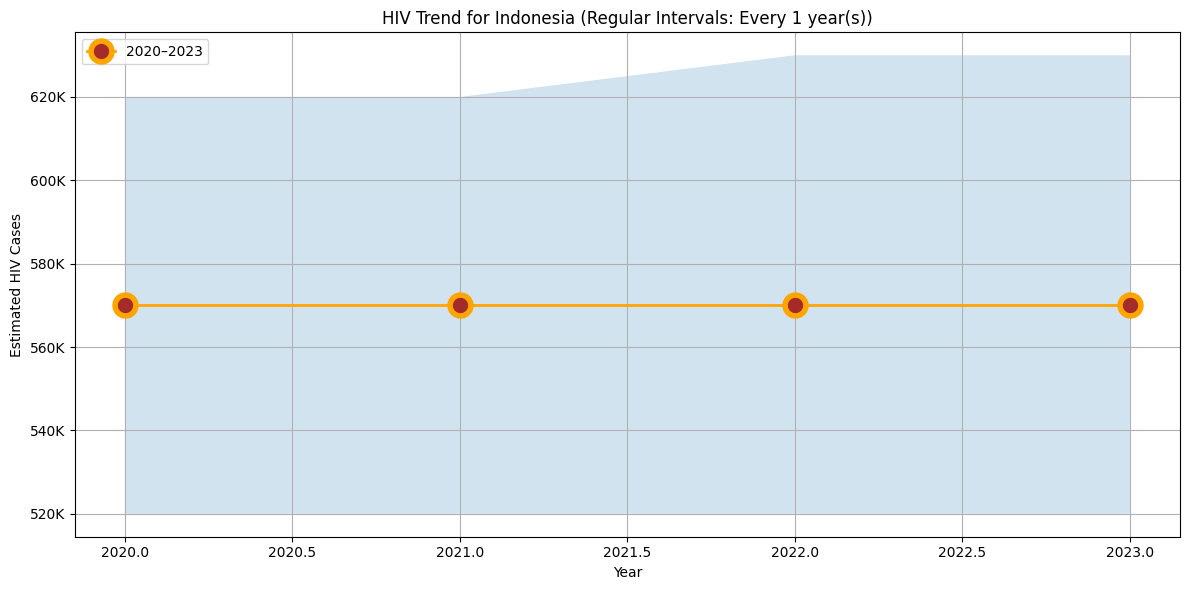

In [329]:
# Since all other countries apart from India have data in all other years I can visualize them independently and also their
# total trend over the years. Lets' first finish visualizing the rest
for country in ['Uganda','Kenya','Zimbabwe','Zambia','Brazil','Malawi','Ethiopia','Thailand','Indonesia']:
    # for the 5 year interval
    plot_regular_segments(time_series_df, country, interval=5)
    # For the current 1 year interval
    plot_regular_segments(time_series_df, country, interval=1)

### Summary Findings
In Uganda, HIV cases remained constant from 2000 to 2005,
then showed a steady rise from 2005 to 2020 in 5-year intervals. From 2020 to 2023, the numbers remained stable

In Kenya, HIV cases declined from 2000 to 2010, then remained stable from 2010 to 2020 based on 5-year intervals. Between 2020 and 2021, there was another drop, followed by a constant trend through 2023.

In Zimbabwe, HIV cases declined from 2000 to 2010, rose between 2010 and 2015, then declined again from 2015 to 2020 in 5-year intervals. From 2020 to 2023, the trend remained constant.

Zambia recorded a steady rise in HIV cases from 2000 to 2020 in 5-year intervals. From 2020 to 2023, the trend remained constant.

Brazil experienced a steady rise in HIV cases from 2000 to 2020 in 5-year intervals, with the upward trend continuing from 2020 to 2023 in 1-year intervals.

In Malawi, HIV cases declined from 2000 to 2005, then steadily rose from 2005 to 2015, followed by a stable trend from 2015 to 2020 in 5-year intervals. From 2020 to 2021, the numbers remained constant, then steadily declined through 2023.

In Ethiopia, HIV cases experienced a significant drop from 2000 to 2005, followed by a more gradual decline from 2005 to 2020 in 5-year intervals. From 2020 to 2021, the numbers remained constant, then steadily declined from 2021 to 2022, with stability again from 2022 to 2023.

In Thailand, HIV cases steadily declined from 2000 to 2020 in 5-year intervals. From 2020 to 2021, the numbers remained constant, then experienced a slight drop from 2021 to 2022, followed by stability from 2022 to 2023.

In Indonesia, HIV cases rose sharply from 2000 to 2010, then the increase slowed from 2010 to 2020 in 5-year intervals. From 2020 to 2023, the trend remained constant.

# Visualization of HIV Case Trends in Countries Contributing to 75% of the Global Burden

In [330]:
# I will now go ahead and visualize the trend of HIV cases for the selected countries from 2020-2023,
# excluding India, and display the total number of cases.

time_series_df = time_series_df[(time_series_df['Location'] != 'India')&(time_series_df['Period'] >= 2020)][['Period','Location','Estimate_central','Estimate_lower','Estimate_upper']]

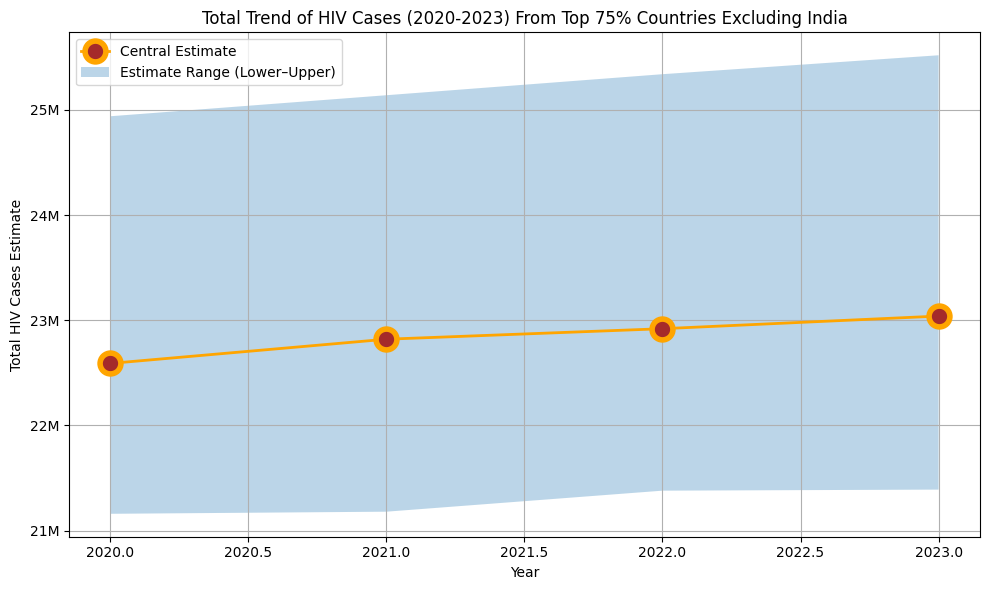

In [331]:
# Group by Year and sum the estimates
sum_by_year = time_series_df.groupby('Period')[['Estimate_central', 'Estimate_lower', 'Estimate_upper']].sum().reset_index()

# Plot the sum of the estimates for each year (central, lower, and upper)
plt.figure(figsize=(10, 6))
plt.plot(sum_by_year['Period'], sum_by_year['Estimate_central'], marker='o',ms = 15,linewidth = 2,
                 markerfacecolor = "brown",markeredgewidth = 4,markeredgecolor = "Orange",color = 'Orange',
                 linestyle='-', label='Central Estimate')
plt.fill_between(sum_by_year['Period'], sum_by_year['Estimate_lower'], sum_by_year['Estimate_upper'], alpha=0.3, label="Estimate Range (Lower–Upper)")

plt.title('Total Trend of HIV Cases (2020-2023) From Top 75% Countries Excluding India')
plt.xlabel('Year')
plt.ylabel('Total HIV Cases Estimate')
plt.grid(True)
plt.legend()
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: human_format(x)))
plt.tight_layout()
plt.show()

When combining the totals across the top 75% countries excluding India from 2020 to 2023, the overall trend shows a steady rise in HIV cases.

### Generate a visualization that displays the trend of HIV cases in the countries contributing to 75% of the burden within each WHO region (column called ParentLocationCode contains the WHO regions)

In [332]:
df['ParentLocationCode'].unique()

array(['AFR', 'AMR', 'EMR', 'EUR', 'SEAR', 'WPR'], dtype=object)

In [333]:
# Within each region, I will first group the results by region,
# then get the top 75% contributors per region.
# I will sum their Estimate_central, upper, and lower estimates,
# and visualize the trend of their years.
# I will create a reusable function for this.

def get_top_75_per_region(df, region):
    """
    This function identifies the countries contributing to 75% of the total HIV burden in a given region
    based on their central estimate values.

    Parameters:
    df (DataFrame): The HIV data.
    region (str): The region code for grouping by region (from 'ParentLocationCode').

    Returns:
    list: A list of countries contributing to 75% of the HIV burden in the specified region.
    """
    # Filter data for the specified region and year 2023
    region_data = df[(df['ParentLocationCode'] == region) & (df['Period'] == 2023)]

    # Sort the data by central estimate in descending order
    region_data = region_data.sort_values('Estimate_central', ascending=False)

    # Calculate cumulative contribution percentage
    region_data['cumulative_contribution_%'] = region_data['Estimate_central'].cumsum() / region_data['Estimate_central'].sum() * 100

    # Round off the cumulative contribution percentage to a whole number
    region_data['cumulative_contribution_%'] = region_data['cumulative_contribution_%'].apply(lambda x: round(x) if pd.notna(x) else x)

    # Identify the top countries contributing to 75% or more of the HIV burden
    top_countries = []
    for idx, row in region_data.iterrows():
        top_countries.append(idx)
        if row['cumulative_contribution_%'] >= 75:
            break

    # Get the list of countries contributing to 75% of the burden
    top_75_per_region = list(region_data['Location'].loc[top_countries])

    return top_75_per_region


In [334]:
regions = ['AFR', 'AMR', 'EMR', 'EUR', 'SEAR', 'WPR']
# Dictionary to store each regions countries
regions_dict = {}
for region in regions:
    regions_dict[f'region_{region}'] = get_top_75_per_region(df,region)

In [335]:
#Call a region to confirm the functionality of the function
regions_dict['region_AFR']

['South Africa',
 'Mozambique',
 'Nigeria',
 'United Republic of Tanzania',
 'Uganda',
 'Kenya',
 'Zimbabwe',
 'Zambia']

In [336]:
# I will create a function to show the HIV trend within regions for the period 2020-2023,
# as this is recent and most countries have data for this period.

def trend_within_regions(df, region, regions_dict):
    """
    This function visualizes the HIV trend within a specified region from 2020 to 2023.
    It plots the central estimate along with the range of estimates (lower to upper) for each year.

    Parameters:
    df (DataFrame): The HIV data containing information on countries, periods, and estimates.
    region (str): The region code for the region of interest (from 'ParentLocationCode').
    regions_dict (dict): A dictionary mapping region codes to lists of countries in those regions.

    Returns:
    None: Displays the trend visualization for the specified region.
    """
    # Filter data for the specified region and period (2020-2023) and valid central estimates
    region_data = df[(df['Period'] >= 2020) &
                     (df['ParentLocationCode'] == region) &
                     (df['Location'].isin(regions_dict[f'region_{region}'])) &
                     df['Estimate_central'].notna()]

    # Group by year and sum the central, lower, and upper estimates
    yearly_sum_df = region_data.groupby('Period')[['Estimate_central', 'Estimate_lower', 'Estimate_upper']].sum().reset_index()

    # Plot the sum of the estimates for each year (central, lower, and upper)
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_sum_df['Period'], yearly_sum_df['Estimate_central'], marker='o', ms=15, linewidth=2,
             markerfacecolor="brown", markeredgewidth=4, markeredgecolor="Orange", color='Orange',
             linestyle='-', label='Central Estimate')

    # Fill the area between the lower and upper estimates for the range
    plt.fill_between(yearly_sum_df['Period'], yearly_sum_df['Estimate_lower'], yearly_sum_df['Estimate_upper'], alpha=0.3, label="Estimate Range (Lower–Upper)")

    # Set title, labels, and grid
    plt.title(f'Trend of HIV Cases in {region} region')
    plt.xlabel('Year')
    plt.ylabel('HIV Cases Estimate')
    plt.grid(True)
    plt.legend()
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: human_format(x)))
    plt.tight_layout()
    plt.show()


In [337]:
#Checking present years per region before plotting, starting with AFR
for country in regions_dict['region_AFR']:
  check_available_years(df,country)

Years available for South Africa:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Mozambique:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Nigeria:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for United Republic of Tanzania:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Uganda:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Kenya:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Z

# Visualization of HIV Case Trends in Countries Contributing to 75% of the Global Burden within Each WHO Region

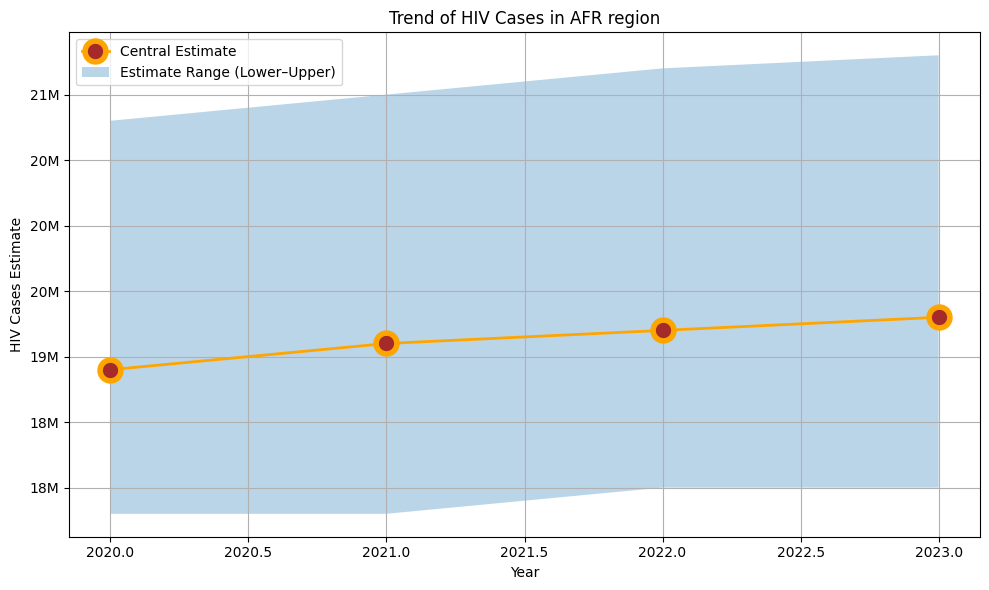

In [338]:
#Plotting AFR
trend_within_regions(df,'AFR',regions_dict)

When aggregating the top 75% of African contributors, the overall HIV trend shows a steady rise from 2020 to 2023

In [339]:
#Checking present years per in AMR region
for country in regions_dict['region_AMR']:
  check_available_years(df,country)

Years available for Brazil:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Mexico:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Colombia:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Argentina:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Haiti:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Peru:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]


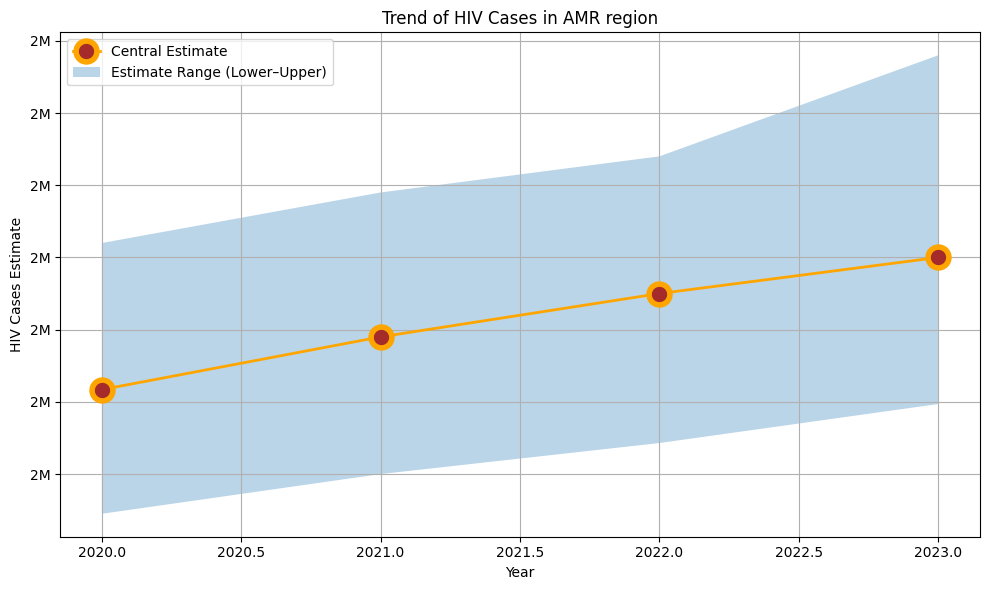

In [340]:
#Plotting AMR
trend_within_regions(df,'AMR',regions_dict)

The AMR region shows a steady rise in HIV cases from 2020 to 2023

In [341]:
#Checking present years per in EMR region
for country in regions_dict['region_EMR']:
  check_available_years(df,country)

Years available for Pakistan:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Sudan:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Iran (Islamic Republic of):
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Egypt:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]


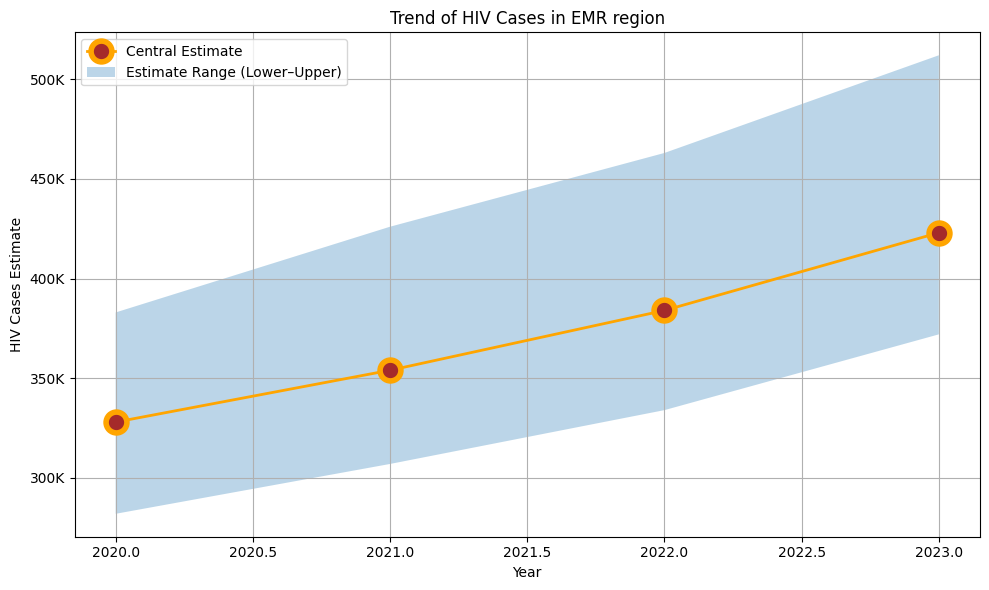

In [342]:
#Plotting EMR
trend_within_regions(df,'EMR',regions_dict)

Among the top 75% contributors in the EMR region, HIV cases shows a steady rise, from 2020 to 2023.

In [343]:
#Checking present years per in EUR region
for country in regions_dict['region_EUR']:
  check_available_years(df,country)

Years available for France:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Spain:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Italy:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Uzbekistan:
 [np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Portugal:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Kazakhstan:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]


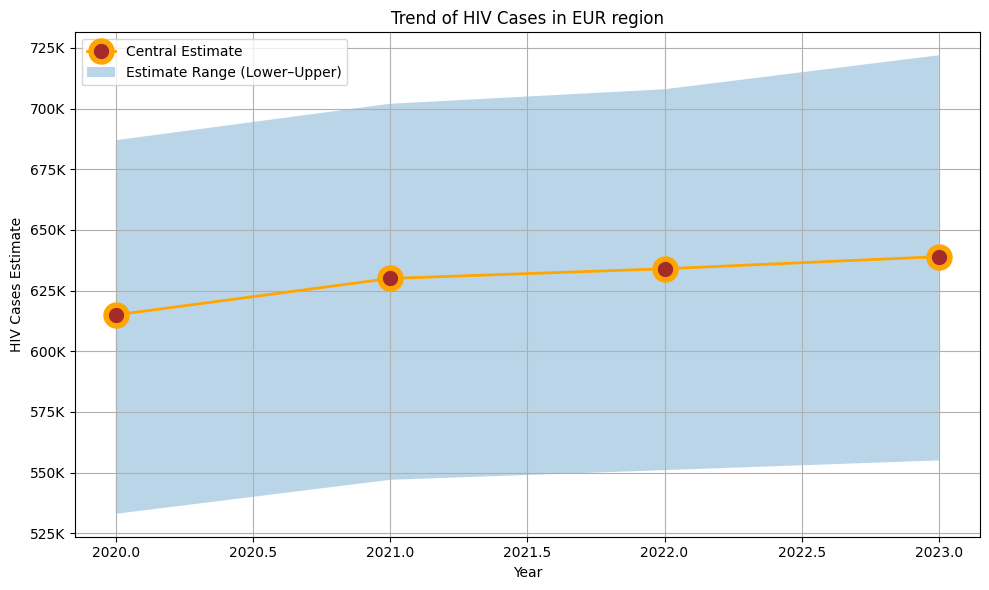

In [344]:
#Plotting EUR
trend_within_regions(df,'EUR',regions_dict)

There is rise in cases in the EUR region but it is slower compared to other regions above

In [345]:
#Checking present years per in SEAR region
for country in regions_dict['region_WPR']:
  check_available_years(df,country)

Years available for Viet Nam:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Philippines:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Malaysia:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Years available for Papua New Guinea:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]


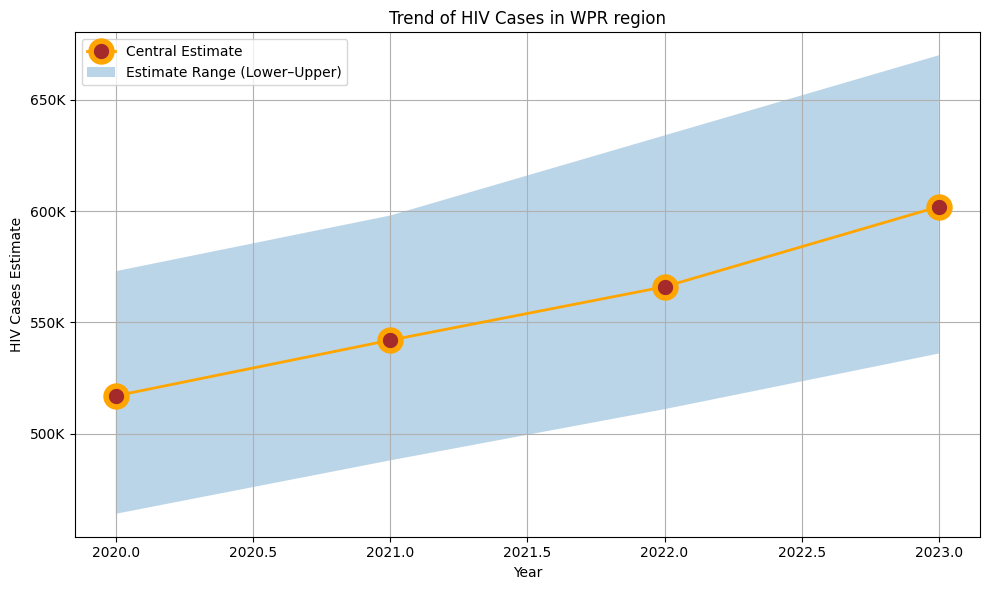

In [346]:
#Plotting WPR_region
trend_within_regions(df,'WPR',regions_dict)

The WPR region has experienced a steady rise in HIV cases from 2020 to 2023.

In [347]:
#Checking present years per in SEAR region
for country in regions_dict['region_SEAR']:
  check_available_years(df,country)

Years available for India:
 [np.int64(2023)]
Years available for Thailand:
 [np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]


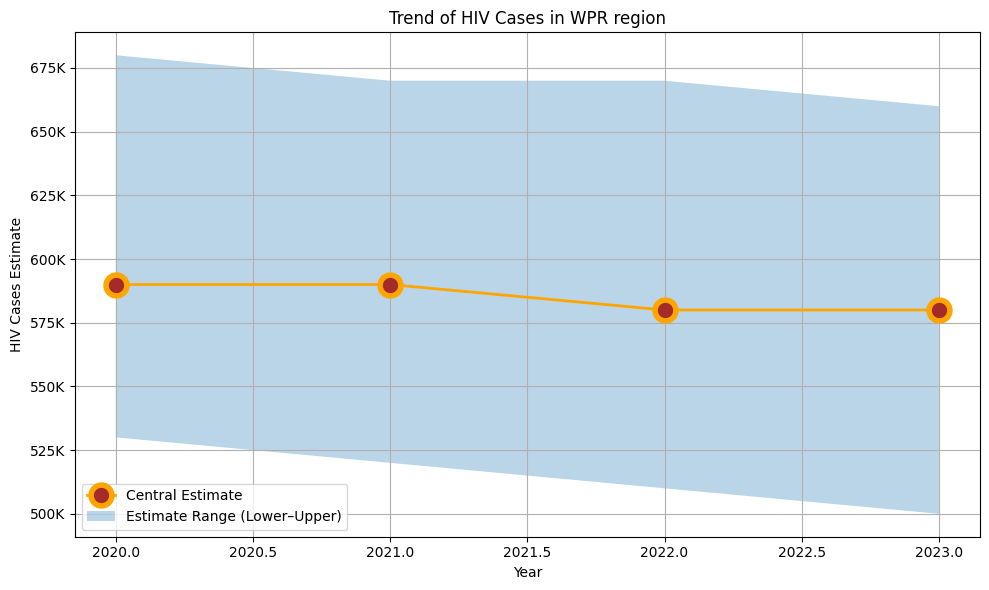

In [348]:
#Plotting SEAR with India excluded. now only showing Thailand
thai_df = df[(df['Location'] == 'Thailand') & (df['Period'] >= 2020) & (df['Estimate_central'].notna())]
plt.figure(figsize=(10, 6))
plt.plot(thai_df['Period'], thai_df['Estimate_central'], marker='o',ms = 15,linewidth = 2,
         markerfacecolor = "brown",markeredgewidth = 4,markeredgecolor = "Orange",color = 'Orange',
         linestyle='-', label='Central Estimate')
plt.fill_between(thai_df['Period'], thai_df['Estimate_lower'], thai_df['Estimate_upper'], alpha=0.3, label="Estimate Range (Lower–Upper)")

plt.title(f'Trend of HIV Cases in {region} region')
plt.xlabel('Year')
plt.ylabel('HIV Cases Estimate')
plt.grid(True)
plt.legend()
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: human_format(x)))
plt.tight_layout()
plt.show()

### Summary Findings
The analysis of HIV trends among the top 75% contributors by WHO region reveals distinct patterns from 2020 to 2023. In the AMR region, HIV cases show a steady rise over the period. Similarly, the overall HIV trend for the top 75% contributors in the African region also demonstrates a consistent increase from 2020 to 2023. The EMR region follows the same trend, with a steady rise in HIV cases from 2020 to 2023. In contrast,the SEAR region, based solely on Thailand (as India was excluded due to missing historical data), HIV cases remained constant from 2020 to 2021, experienced a slight drop from 2021 to 2022, and then stayed constant through 2023.

# Analyzing the relationship between people living with HIV and multidimensional poverty

In [349]:
# loading multidimensional data
data = pd.read_excel('/content/multidimensional_poverty.xlsx')
data.head()

,"Individuals in households deprived in each indicator, 110 economies, circa year 2021 (2018-2023)\nDate: October 2024",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Region,Country code,Economy,Reporting year,Survey name,Survey year,Survey coverage,Welfare type,Survey comparability,Deprivation rate (share of population),NaN,NaN,NaN,NaN,NaN,Multidimensional poverty headcount ratio (%)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monetary (%),Educational attainment (%),Educational enrollment (%),Electricity (%),Sanitation (%),Drinking water (%),NaN
2,SSA,AGO,Angola,2018,IDREA,2018,N,c,2,31.122005,29.753423,27.44306,52.639532,53.637516,32.106507,47.203606
3,ECA,ALB,Albania,2012,HBS,2018,N,c,1,0.048107,0.19238,-,0.06025,6.579772,9.594966,0.293161
4,LAC,ARG,Argentina,2010,EPHC-S2,2021,U,i,3,0.894218,1.08532,0.731351,0,0.257453,0.364048,0.906573


### Cleaning Multidimensional poverty dataset

In [350]:
# Cleaning the column names

new_columns = []

for col0,col1 in zip(data.iloc[0],data.iloc[1]):
    if pd.notna(col0):
        new_columns.append(col0)
    else:
        new_columns.append(col1)

new_columns

['Region',
 'Country code',
 'Economy',
 'Reporting year',
 'Survey name',
 'Survey year',
 'Survey coverage',
 'Welfare type',
 'Survey comparability',
 'Deprivation rate (share of population)',
 'Educational attainment (%)',
 'Educational enrollment (%)',
 'Electricity (%)',
 'Sanitation (%)',
 'Drinking water (%)',
 'Multidimensional poverty headcount ratio (%)']

In [351]:
# now I will change the remaining part which is switch 'Deprivation rate (share of population)' with Monetary (%)
new_columns = ['Region','Country code','Economy','Reporting year','Survey name',
               'Survey year','Survey coverage','Welfare type',
               'Survey comparability','Monetary (%)',
               'Educational attainment (%)','Educational enrollment (%)',
               'Electricity (%)','Sanitation (%)','Drinking water (%)','Multidimensional poverty headcount ratio (%)']

In [352]:
data = data.drop([0,1])
data.columns = new_columns
data.head()

,Region,Country code,Economy,Reporting year,Survey name,Survey year,Survey coverage,Welfare type,Survey comparability,Monetary (%),Educational attainment (%),Educational enrollment (%),Electricity (%),Sanitation (%),Drinking water (%),Multidimensional poverty headcount ratio (%)
2,SSA,AGO,Angola,2018,IDREA,2018,N,c,2,31.122005,29.753423,27.44306,52.639532,53.637516,32.106507,47.203606
3,ECA,ALB,Albania,2012,HBS,2018,N,c,1,0.048107,0.19238,-,0.06025,6.579772,9.594966,0.293161
4,LAC,ARG,Argentina,2010,EPHC-S2,2021,U,i,3,0.894218,1.08532,0.731351,0,0.257453,0.364048,0.906573
5,ECA,ARM,Armenia,2010,ILCS,2021,N,c,1,0.523521,0,1.793004,0,0.397725,0.660082,0.523521
6,EAP,AUS,Australia,2010,SIH-LIS,2018,N,I,3,0.51688,1.71188,-,0,0,-,2.21577


In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 2 to 111
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Region                                        110 non-null    object
 1   Country code                                  110 non-null    object
 2   Economy                                       110 non-null    object
 3   Reporting year                                110 non-null    object
 4   Survey name                                   110 non-null    object
 5   Survey year                                   110 non-null    object
 6   Survey coverage                               110 non-null    object
 7   Welfare type                                  110 non-null    object
 8   Survey comparability                          110 non-null    object
 9   Monetary (%)                                  110 non-null    object
 10  Ed

In [354]:
#Strip the column names for easy stating
data.columns = [col.strip().lower().replace(' ','_') for col in data.columns]

In [355]:
data.head()

,region,country_code,economy,reporting_year,survey_name,survey_year,survey_coverage,welfare_type,survey_comparability,monetary_(%),educational_attainment_(%),educational_enrollment_(%),electricity_(%),sanitation_(%),drinking_water_(%),multidimensional_poverty_headcount_ratio_(%)
2,SSA,AGO,Angola,2018,IDREA,2018,N,c,2,31.122005,29.753423,27.44306,52.639532,53.637516,32.106507,47.203606
3,ECA,ALB,Albania,2012,HBS,2018,N,c,1,0.048107,0.19238,-,0.06025,6.579772,9.594966,0.293161
4,LAC,ARG,Argentina,2010,EPHC-S2,2021,U,i,3,0.894218,1.08532,0.731351,0,0.257453,0.364048,0.906573
5,ECA,ARM,Armenia,2010,ILCS,2021,N,c,1,0.523521,0,1.793004,0,0.397725,0.660082,0.523521
6,EAP,AUS,Australia,2010,SIH-LIS,2018,N,I,3,0.51688,1.71188,-,0,0,-,2.21577


In [356]:
# Already i can see '_' from the header for unavailable data. We will clean this. but first
# lets filter and remain with our desired data according to timeframe that would help our analysis
# As we are merging with HIV cases data, Its correct to have data of the same year in the datasets
# this dataset has data from 2018 to 2022. we will need data from 2020 - 2022.We will also filter our HIV dataframe to this
# timeframe
data['survey_year'].unique()

array([2018, 2021, 2022, 2020, 2019], dtype=object)

In [357]:
data['survey_year'] = data['survey_year'].astype(int)

In [358]:
# filtering by year
data = data[(data['survey_year'] >= 2020) & (data['survey_year'] <= 2022)]

In [359]:
data=data.sort_values('survey_year',ascending=False)
data.head()

,region,country_code,economy,reporting_year,survey_name,survey_year,survey_coverage,welfare_type,survey_comparability,monetary_(%),educational_attainment_(%),educational_enrollment_(%),electricity_(%),sanitation_(%),drinking_water_(%),multidimensional_poverty_headcount_ratio_(%)
9,ECA,BEL,Belgium,2009,EU-SILC,2022,N,i,2,0.029965,0.64869,-,0,-,0,0.679716
7,ECA,AUT,Austria,2009,EU-SILC,2022,N,i,2,0.485822,0.176422,-,0,-,0,0.662245
17,SAR,BTN,Bhutan,2012,BLSS,2022,N,c,1,0.001539,26.586553,3.752971,0.229128,7.07523,0.044948,1.301685
19,LAC,CHL,Chile,2011,CASEN,2022,N,i,2,0.395051,3.214191,0.378281,0.289264,1.167916,1.111704,0.46388
13,ECA,BGR,Bulgaria,2009,EU-SILC,2022,N,i,5,0.699141,0.628835,-,0,-,0,1.327977


In [360]:
#now lets clean the data of duplicates
data[data.duplicated(keep=False)]

,region,country_code,economy,reporting_year,survey_name,survey_year,survey_coverage,welfare_type,survey_comparability,monetary_(%),educational_attainment_(%),educational_enrollment_(%),electricity_(%),sanitation_(%),drinking_water_(%),multidimensional_poverty_headcount_ratio_(%)


In [361]:
#no duplicates. now we replace the '-' with nans for easier handling
data = data.replace('-',np.nan)
data.head()

<ipython-input-361-eec9db5f17fa>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('-',np.nan)


,region,country_code,economy,reporting_year,survey_name,survey_year,survey_coverage,welfare_type,survey_comparability,monetary_(%),educational_attainment_(%),educational_enrollment_(%),electricity_(%),sanitation_(%),drinking_water_(%),multidimensional_poverty_headcount_ratio_(%)
9,ECA,BEL,Belgium,2009,EU-SILC,2022,N,i,2,0.029965,0.648690,NaN,0.000000,NaN,0.000000,0.679716
7,ECA,AUT,Austria,2009,EU-SILC,2022,N,i,2,0.485822,0.176422,NaN,0.000000,NaN,0.000000,0.662245
17,SAR,BTN,Bhutan,2012,BLSS,2022,N,c,1,0.001539,26.586553,3.752971,0.229128,7.075230,0.044948,1.301685
19,LAC,CHL,Chile,2011,CASEN,2022,N,i,2,0.395051,3.214191,0.378281,0.289264,1.167916,1.111704,0.463880
13,ECA,BGR,Bulgaria,2009,EU-SILC,2022,N,i,5,0.699141,0.628835,NaN,0.000000,NaN,0.000000,1.327977


In [362]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 9 to 104
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   region                                        82 non-null     object 
 1   country_code                                  82 non-null     object 
 2   economy                                       82 non-null     object 
 3   reporting_year                                82 non-null     object 
 4   survey_name                                   82 non-null     object 
 5   survey_year                                   82 non-null     int64  
 6   survey_coverage                               82 non-null     object 
 7   welfare_type                                  82 non-null     object 
 8   survey_comparability                          82 non-null     int64  
 9   monetary_(%)                                  82 non-null     float64
 

# Merging HIV Dataset with World Bank Data on Multidimensional Poverty Headcount Ratio (Income, Education, Access to Services)

In [363]:
#Now lets merge the two datasets for further analysis

merged_df = pd.merge(df,data,left_on = ['Location','Period'],right_on = ['economy','survey_year'],how = 'inner')

In [364]:
merged_df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,survey_coverage,welfare_type,survey_comparability,monetary_(%),educational_attainment_(%),educational_enrollment_(%),electricity_(%),sanitation_(%),drinking_water_(%),multidimensional_poverty_headcount_ratio_(%)
0,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,BDI,Burundi,Year,2020,...,N,c,1,62.065762,44.881231,34.211618,90.568537,91.007495,12.021417,79.209852
1,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,BEN,Benin,Year,2021,...,N,c,1,12.723279,49.023893,31.661823,34.818304,76.649594,24.109130,45.443240
2,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,BFA,Burkina Faso,Year,2021,...,N,c,3,25.277072,47.893941,51.009065,35.258174,58.732605,17.327691,52.981192
3,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,CIV,Cote d'Ivoire,Year,2021,...,N,c,2,9.733193,44.493997,24.717054,9.264950,59.909374,17.286547,29.177094
4,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,GNB,Guinea-Bissau,Year,2021,...,N,c,3,25.962856,20.071073,31.059781,27.570510,60.362864,20.897064,38.730049


In [365]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 30 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   IndicatorCode                                 59 non-null     object 
 1   Indicator                                     59 non-null     object 
 2   ValueType                                     59 non-null     object 
 3   ParentLocationCode                            59 non-null     object 
 4   ParentLocation                                59 non-null     object 
 5   Location type                                 59 non-null     object 
 6   SpatialDimValueCode                           59 non-null     object 
 7   Location                                      59 non-null     object 
 8   Period type                                   59 non-null     object 
 9   Period                                        59 non-null     int64

In [366]:
# even after merging there are still rows with missing data, we need to drop them for our mixed effects model
merged_df = merged_df.dropna()

In [367]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 58
Data columns (total 30 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   IndicatorCode                                 39 non-null     object 
 1   Indicator                                     39 non-null     object 
 2   ValueType                                     39 non-null     object 
 3   ParentLocationCode                            39 non-null     object 
 4   ParentLocation                                39 non-null     object 
 5   Location type                                 39 non-null     object 
 6   SpatialDimValueCode                           39 non-null     object 
 7   Location                                      39 non-null     object 
 8   Period type                                   39 non-null     object 
 9   Period                                        39 non-null     int64  
 1

In [368]:
merged_df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,survey_coverage,welfare_type,survey_comparability,monetary_(%),educational_attainment_(%),educational_enrollment_(%),electricity_(%),sanitation_(%),drinking_water_(%),multidimensional_poverty_headcount_ratio_(%)
0,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,BDI,Burundi,Year,2020,...,N,c,1,62.065762,44.881231,34.211618,90.568537,91.007495,12.021417,79.209852
1,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,BEN,Benin,Year,2021,...,N,c,1,12.723279,49.023893,31.661823,34.818304,76.649594,24.109130,45.443240
2,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,BFA,Burkina Faso,Year,2021,...,N,c,3,25.277072,47.893941,51.009065,35.258174,58.732605,17.327691,52.981192
3,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,CIV,Cote d'Ivoire,Year,2021,...,N,c,2,9.733193,44.493997,24.717054,9.264950,59.909374,17.286547,29.177094
4,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,GNB,Guinea-Bissau,Year,2021,...,N,c,3,25.962856,20.071073,31.059781,27.570510,60.362864,20.897064,38.730049


In [369]:
# filtering to remain with the desired columns for analysis. i will be using the central estimate
merged_df = merged_df[['Location', 'Period', 'Estimate_central', 'monetary_(%)', 'educational_attainment_(%)',
                       'educational_enrollment_(%)', 'electricity_(%)', 'sanitation_(%)',
                       'drinking_water_(%)', 'multidimensional_poverty_headcount_ratio_(%)']]

In [370]:
merged_df.head()

,Location,Period,Estimate_central,monetary_(%),educational_attainment_(%),educational_enrollment_(%),electricity_(%),sanitation_(%),drinking_water_(%),multidimensional_poverty_headcount_ratio_(%)
0,Burundi,2020,82000.0,62.065762,44.881231,34.211618,90.568537,91.007495,12.021417,79.209852
1,Benin,2021,69000.0,12.723279,49.023893,31.661823,34.818304,76.649594,24.109130,45.443240
2,Burkina Faso,2021,99000.0,25.277072,47.893941,51.009065,35.258174,58.732605,17.327691,52.981192
3,Cote d'Ivoire,2021,430000.0,9.733193,44.493997,24.717054,9.264950,59.909374,17.286547,29.177094
4,Guinea-Bissau,2021,35000.0,25.962856,20.071073,31.059781,27.570510,60.362864,20.897064,38.730049


# Analyzing the Relationship Between HIV Prevalence and Multidimensional Poverty, Including Contributing Factors and Accounting for Random Effects (Country, Year)

In [371]:
# I need to rename my columns for them to work well in my model
# Clean the column names
merged_df = merged_df.rename(columns={
    'multidimensional_poverty_headcount_ratio_(%)': 'multidimensional_poverty',
    'monetary_(%)': 'monetary',
    'educational_attainment_(%)': 'educational_attainment',
    'educational_enrollment_(%)': 'educational_enrollment',
    'electricity_(%)': 'electricity',
    'sanitation_(%)': 'sanitation',
    'drinking_water_(%)': 'drinking_water'
})


In [372]:
#standardizing my estimate_central column
scaler = StandardScaler()
merged_df['Estimate_central_std'] = scaler.fit_transform(merged_df[['Estimate_central']])


In [373]:
merged_df.columns

Index(['Location', 'Period', 'Estimate_central', 'monetary',
       'educational_attainment', 'educational_enrollment', 'electricity',
       'sanitation', 'drinking_water', 'multidimensional_poverty',
       'Estimate_central_std'],
      dtype='object')

In [374]:
merged_df = merged_df.drop(columns = ['Estimate_central'])

In [375]:
model = smf.mixedlm(
    formula="Estimate_central_std ~ monetary + educational_attainment + educational_enrollment + electricity + sanitation + drinking_water",
    data=merged_df,
    groups=merged_df["Location"],
    re_formula="~Period"
)


In [376]:
result = model.fit()
print(result.summary())

                Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Estimate_central_std
No. Observations:  39       Method:              REML                
No. Groups:        39       Scale:               0.0000              
Min. group size:   1        Log-Likelihood:      -62.9214            
Max. group size:   1        Converged:           Yes                 
Mean group size:   1.0                                               
---------------------------------------------------------------------
                       Coef.    Std.Err.     z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept              -0.267        0.180 -1.485 0.137 -0.619  0.085
monetary                0.057        0.014  3.925 0.000  0.028  0.085
educational_attainment  0.004        0.015  0.280 0.780 -0.025  0.033
educational_enrollment -0.030        0.021 -1.442 0.149 -0.070  0.011
electricity            -0.030       

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


Monetary poverty is the strongest positive predictor of higher HIV numbers.

Better electricity access is associated with slightly lower HIV numbers.

Better drinking water is associated with higher HIV numbers (unexpected — could be that countries with more HIV programs also invest in water, not a causal link).

Education and sanitation factors were not statistically significant in this small sample.

<ipython-input-377-108287dee378>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Predictor', data=results_df, palette='coolwarm', orient='h')


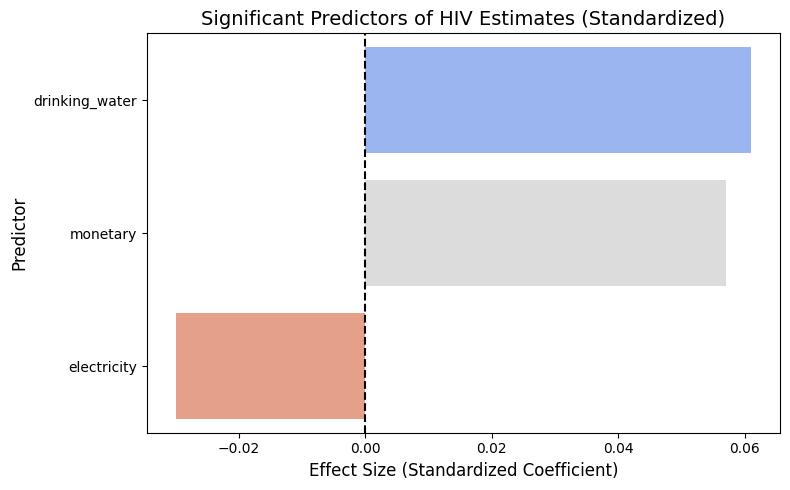

In [377]:
results_df = pd.DataFrame({
    'Predictor': ['monetary', 'electricity', 'drinking_water'],
    'Coefficient': [0.057, -0.030, 0.061],
    'p_value': [0.000, 0.019, 0.002]
})

# Sort by effect size
results_df = results_df.sort_values('Coefficient', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Predictor', data=results_df, palette='coolwarm', orient='h')
plt.axvline(0, color='black', linestyle='--')
plt.title('Significant Predictors of HIV Estimates (Standardized)', fontsize=14)
plt.xlabel('Effect Size (Standardized Coefficient)', fontsize=12)
plt.ylabel('Predictor', fontsize=12)
plt.tight_layout()
plt.show()


In [378]:
# Model: Using only multidimensional poverty headcount
model_poverty_only = smf.mixedlm(
    formula="Estimate_central_std ~ multidimensional_poverty",
    data=merged_df,
    groups=merged_df["Location"],
    re_formula="~Period"  # Random slope for year
)

result_poverty_only = model_poverty_only.fit()
print(result_poverty_only.summary())


                 Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  Estimate_central_std
No. Observations:    39       Method:              REML                
No. Groups:          39       Scale:               0.0000              
Min. group size:     1        Log-Likelihood:      -59.6402            
Max. group size:     1        Converged:           Yes                 
Mean group size:     1.0                                               
-----------------------------------------------------------------------
                         Coef.    Std.Err.     z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                -0.140        0.198 -0.709 0.478 -0.528  0.247
multidimensional_poverty  0.008        0.006  1.224 0.221 -0.005  0.020
Group Var                 0.000 66795575.148                           
Group x Period Cov        0.000    33043.058                           
Period Va

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


### Summary Findings
I merged HIV prevalence data with multidimensional poverty indicators across countries from 2020–2022 and built a mixed-effects model accounting for random effects by country and year. When testing the overall multidimensional poverty headcount ratio alone, it was not a statistically significant predictor of HIV rates (p = 0.221). However, when analyzing individual poverty components, several factors showed strong relationships with HIV prevalence. Higher monetary poverty and lack of access to clean drinking water were significantly associated with higher standardized HIV estimates (p < 0.01), while better access to electricity was associated with lower HIV prevalence (p < 0.05). These findings suggest that broader poverty measures may mask important differences, and that specific deprivations especially financial and infrastructural,are more directly linked to HIV outcomes.

## Task 2

1. **Filter data for the eight countries belonging to the East African Community (EAC)**.
   - You can find the list of countries in the EAC [here](https://www.eac.int/overview-of-eac).

2. **Visualize the latest estimate** of both the under-five mortality rate and neonatal mortality rate at the country level.
   - Use shapefiles from [GADM](www.gadm.org) for this visualization.

3. **Show the average trends in mortality rates** over time.
   - Plot the average trend line for both mortality rates.
   - Add points representing the country-level estimates for each indicator.
   - Expectation: Two plots, one for each indicator (under-five and neonatal mortality).

4. **Identify the countries with the highest rates** based on your visualizations:
   - Identify the countries in East Africa with the highest under-five mortality rates.
   - Identify the countries in East Africa with the highest neonatal mortality rates.



### Data Cleaning

In [379]:
#loading the neonatal data
neonatal_df = pd.read_csv('/content/neonatal_mortality_rate.csv')
neonatal_df.head()

,REF_AREA,Geographic area,INDICATOR,Indicator,SEX,Sex,WEALTH_QUINTILE,Wealth Quintile,SERIES_NAME,Series Name,...,DEFINITION,INTERVAL,SERIES_METHOD,Series Method,LOWER_BOUND,UPPER_BOUND,STATUS,YEAR_TO_ACHIEVE,MODEL,Model Used
0,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRM0,Neonatal mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,43.782426,47.617352,NaN,NaN,NaN,NaN
1,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRM0,Neonatal mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,43.413053,47.180684,NaN,NaN,NaN,NaN
2,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRM0,Neonatal mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,43.084346,46.798108,NaN,NaN,NaN,NaN
3,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRM0,Neonatal mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,42.653348,46.304417,NaN,NaN,NaN,NaN
4,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRM0,Neonatal mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,42.378536,45.948982,NaN,NaN,NaN,NaN


In [380]:
neonatal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   REF_AREA                34 non-null     object 
 1   Geographic area         34 non-null     object 
 2   INDICATOR               34 non-null     object 
 3   Indicator               34 non-null     object 
 4   SEX                     34 non-null     object 
 5   Sex                     34 non-null     object 
 6   WEALTH_QUINTILE         34 non-null     object 
 7   Wealth Quintile         34 non-null     object 
 8   SERIES_NAME             34 non-null     object 
 9   Series Name             34 non-null     object 
 10  SERIES_YEAR             34 non-null     int64  
 11  Series Year             34 non-null     int64  
 12  REGIONAL_GROUP          0 non-null      float64
 13  Regional group          0 non-null      float64
 14  TIME_PERIOD             34 non-null     obje

In [381]:
#checking geographic area uniques values
neonatal_df['Geographic area'].unique()

array(['Sub-Saharan Africa'], dtype=object)

In [382]:
un5_df = pd.read_csv('/content/under_five mortality rate.csv')
un5_df.head()

,REF_AREA,Geographic area,INDICATOR,Indicator,SEX,Sex,WEALTH_QUINTILE,Wealth Quintile,SERIES_NAME,Series Name,...,DEFINITION,INTERVAL,SERIES_METHOD,Series Method,LOWER_BOUND,UPPER_BOUND,STATUS,YEAR_TO_ACHIEVE,MODEL,Model Used
0,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,198.675695,209.928512,NaN,NaN,NaN,NaN
1,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,195.249935,205.879194,NaN,NaN,NaN,NaN
2,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,192.162302,202.345691,NaN,NaN,NaN,NaN
3,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,199.321189,209.822892,NaN,NaN,NaN,NaN
4,UNSDG_SUBSAHARANAFRICA,Sub-Saharan Africa,MRY0T4,Under-five mortality rate,_T,Total,_T,Total,UN_IGME,UN IGME estimate,...,NaN,1,NaN,NaN,196.677399,206.697079,NaN,NaN,NaN,NaN


In [383]:
un5_df['Geographic area'].unique()

array(['Sub-Saharan Africa'], dtype=object)

Looking also at the under 5 dataset, there is no country specific information.Same to the neonatal mortality rate dataset , we will not use them for the analysis. Lets go ahead and look at the added dataset **'dataset_datascience.csv'**

In [384]:
df2 = pd.read_csv('/content/dataset_datascience.csv')
df2.info()

<ipython-input-384-bda50e6a4fd6>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/dataset_datascience.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129564 entries, 0 to 129563
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   REF_AREA                129564 non-null  object 
 1   Geographic area         129564 non-null  object 
 2   Regional group          7138 non-null    object 
 3   Indicator               129564 non-null  object 
 4   Sex                     129564 non-null  object 
 5   Wealth Quintile         129564 non-null  object 
 6   Series Name             129564 non-null  object 
 7   Series Year             129564 non-null  object 
 8   Reference Date          129564 non-null  float64
 9   Observation Value       129528 non-null  float64
 10  Lower Bound             73949 non-null   float64
 11  Upper Bound             73949 non-null   float64
 12  Standard Error          30793 non-null   float64
 13  Country notes           4710 non-null    object 
 14  Observation Status  

In [385]:
df2.head()

,REF_AREA,Geographic area,Regional group,Indicator,Sex,Wealth Quintile,Series Name,Series Year,Reference Date,Observation Value,...,Country notes,Observation Status,Unit of measure,Series Type,Series Category,Series Method,Age Group of Women,Time Since First Birth,Definition,Interval
0,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018,1995.5,47.869030,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
1,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018,2000.5,35.349317,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
2,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018,2005.5,27.699219,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
3,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018,2010.5,21.056003,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0
4,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018,2015.5,20.167379,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5.0


In [386]:
df2['Indicator'].unique()

array(['Neonatal mortality rate', 'Under-five mortality rate'],
      dtype=object)

In [387]:
df2['Geographic area'].unique()

array(['Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia (Plurinational State of)', 'Brazil',
       'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Côte d'Ivoire", 'Cameroon',
       'Democratic Republic of the Congo', 'Congo', 'Cook Islands',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia (Federated States of)', 'Gabon',
       'United Kingdom of G

From the summary we can see the indicator is on neonatal mortality rate and under_5 mortality rate
and geographic area country names. The dataset_datascience.csv contains all the information we require for the analysis

In [388]:
# We remove the completely null columns
df2 = df2.dropna(axis='columns', how='all')

# Filtering data for the eight countries belonging to the East African Community (EAC)

In [389]:
# we filter the dataset to remain with our required countries,which are part of the EAC
#Democratic Republic of the Congo ,Republic of Burundi ,Republic of Kenya ,Republic of Rwanda
#Federal Republic of Somalia,Republic of South Sudan,Republic of Uganda, and,United Republic of Tanzania
#we use names equal to  how they have been labelled in the Georaphic Area column
countries_of_interest = [
    'Democratic Republic of the Congo',
    'Burundi',
    'Kenya',
    'Rwanda',
    'Somalia',
    'South Sudan',
    'Uganda',
    'United Republic of Tanzania'
]


In [390]:
df2 = df2[df2['Geographic area'].isin(countries_of_interest)]

In [391]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5795 entries, 6387 to 113639
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   REF_AREA                5795 non-null   object 
 1   Geographic area         5795 non-null   object 
 2   Regional group          0 non-null      object 
 3   Indicator               5795 non-null   object 
 4   Sex                     5795 non-null   object 
 5   Wealth Quintile         5795 non-null   object 
 6   Series Name             5795 non-null   object 
 7   Series Year             5795 non-null   object 
 8   Reference Date          5795 non-null   float64
 9   Observation Value       5795 non-null   float64
 10  Lower Bound             3312 non-null   float64
 11  Upper Bound             3312 non-null   float64
 12  Standard Error          1907 non-null   float64
 13  Country notes           0 non-null      object 
 14  Observation Status      5795 non-null   

In [392]:
#we have completely null columns after the filter. We clean the dataset of them
df2= df2.dropna(axis='columns', how='all')

In [393]:
#cleaning the column names
df2.columns = [col.lower().replace(' ','_') for col in df2.columns.str.strip()]

In [394]:
df2.columns

Index(['ref_area', 'geographic_area', 'indicator', 'sex', 'wealth_quintile',
       'series_name', 'series_year', 'reference_date', 'observation_value',
       'lower_bound', 'upper_bound', 'standard_error', 'observation_status',
       'unit_of_measure', 'series_type', 'series_category', 'series_method',
       'age_group_of_women', 'time_since_first_birth', 'interval'],
      dtype='object')

In [395]:
# Filter to remain with only required columns for the analysis
df2 = df2[['geographic_area','indicator','reference_date','observation_value']]

In [396]:
df2

,geographic_area,indicator,reference_date,observation_value
6387,Burundi,Neonatal mortality rate,1993.5,36.413480
6388,Burundi,Neonatal mortality rate,1998.5,41.259960
6389,Burundi,Neonatal mortality rate,2003.5,32.839150
6390,Burundi,Neonatal mortality rate,2008.5,28.465570
6391,Burundi,Neonatal mortality rate,2013.5,23.706230
...,...,...,...,...
113635,Uganda,Under-five mortality rate,2019.5,45.307572
113636,Uganda,Under-five mortality rate,2020.5,43.509117
113637,Uganda,Under-five mortality rate,2021.5,41.786456
113638,Uganda,Under-five mortality rate,2022.5,40.493282


In [397]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5795 entries, 6387 to 113639
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   geographic_area    5795 non-null   object 
 1   indicator          5795 non-null   object 
 2   reference_date     5795 non-null   float64
 3   observation_value  5795 non-null   float64
dtypes: float64(2), object(2)
memory usage: 226.4+ KB


# Visualization of the Latest Estimate of Both the Under-Five Mortality Rate and Neonatal Mortality Rate at the Country Level Using Shapefiles

In [398]:
# Now onto the second task of getting the latest indicators per country
df2['reference_date'] = df2['reference_date'].astype(int)
latest_indicators_df = df2.sort_values('reference_date').groupby(['geographic_area','indicator']).tail(1)

In [399]:
latest_indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 55255 to 113639
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   geographic_area    16 non-null     object 
 1   indicator          16 non-null     object 
 2   reference_date     16 non-null     int64  
 3   observation_value  16 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 640.0+ bytes


/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'gadm41_KEN_shp.zip': 'gadm41_KEN_0' (default), 'gadm41_KEN_1', 'gadm41_KEN_2', 'gadm41_KEN_3'. Specify layer parameter to avoid this warning.
  result = read_func(
/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'gadm41_UGA_shp.zip': 'gadm41_UGA_0' (default), 'gadm41_UGA_1', 'gadm41_UGA_2', 'gadm41_UGA_3', 'gadm41_UGA_4'. Specify layer parameter to avoid this warning.
  result = read_func(
/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'gadm41_TZA_shp.zip': 'gadm41_TZA_0' (default), 'gadm41_TZA_1', 'gadm41_TZA_2', 'gadm41_TZA_3'. Specify layer parameter to avoid this warning.
  result = read_func(
/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'gadm41_RWA_shp.zip': 'gadm41_RWA_0' (default), 'gadm41_R

<Axes: >

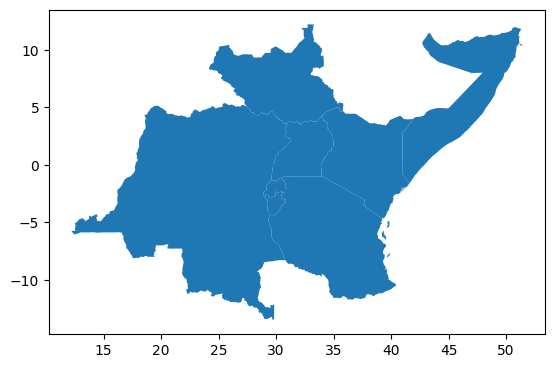

In [400]:
files = [
    "/content/shapefiles/gadm41_KEN_shp.zip",
    "/content/shapefiles/gadm41_UGA_shp.zip",
    "/content/shapefiles/gadm41_TZA_shp.zip",
    "/content/shapefiles/gadm41_RWA_shp.zip",
    "/content/shapefiles/gadm41_BDI_shp.zip",
    "/content/shapefiles/gadm41_SSD_shp.zip",
    "/content/shapefiles/gadm41_COD_shp.zip",
    "/content/shapefiles/gadm41_SOM_shp.zip"
]

# Load and combine
eac = gpd.GeoDataFrame(pd.concat([gpd.read_file(f"zip://{file}") for file in files], ignore_index=True))

# Plot to confirm
eac.plot()


In [401]:
eac.columns

Index(['GID_0', 'COUNTRY', 'geometry'], dtype='object')

In [402]:
# Merge shapefile with latest data
# Need to reshape latest_df so that under-5 and neonatal are separate columns
latest_pivot = latest_indicators_df.pivot(index='geographic_area', columns='indicator', values='observation_value').reset_index()

# Merge
merged = eac.merge(latest_pivot, left_on='COUNTRY', right_on='geographic_area')

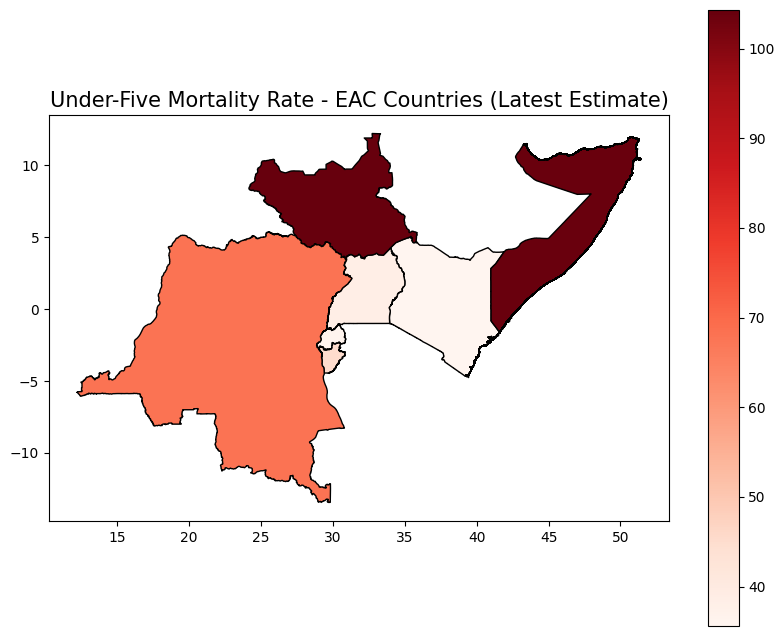

In [403]:
# Plotting under_5 mortality rate of EAC countries
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged.plot(column='Under-five mortality rate',
            cmap='Reds', legend=True, edgecolor='black', ax=ax)
ax.set_title('Under-Five Mortality Rate - EAC Countries (Latest Estimate)', fontsize=15)
plt.show()


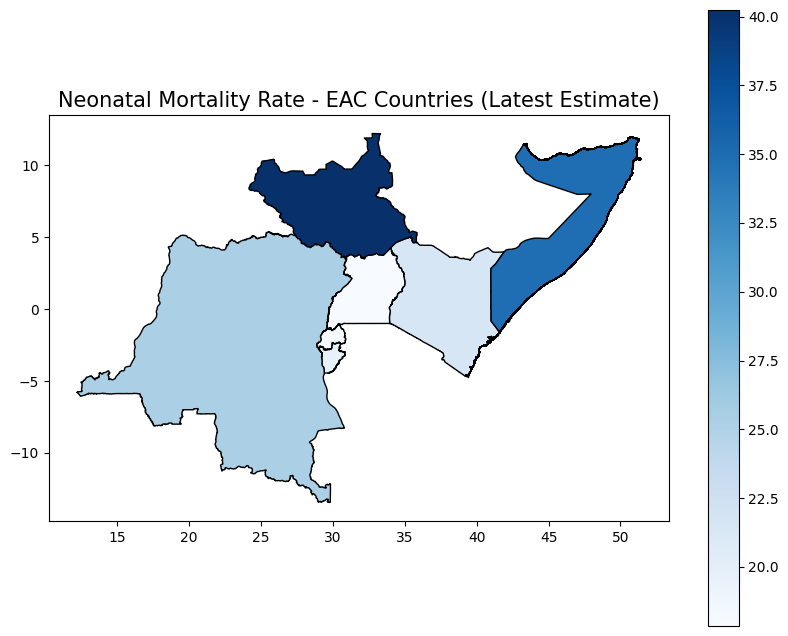

In [404]:
# Plotting neonatal mortality rate of EAC countries
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged.plot(column='Neonatal mortality rate',
            cmap='Blues', legend=True, edgecolor='black', ax=ax)
ax.set_title('Neonatal Mortality Rate - EAC Countries (Latest Estimate)', fontsize=15)
plt.show()


# Visualization of Trends in Both Under-Five and Neonatal Average Mortality Rates Per Year Over Time.

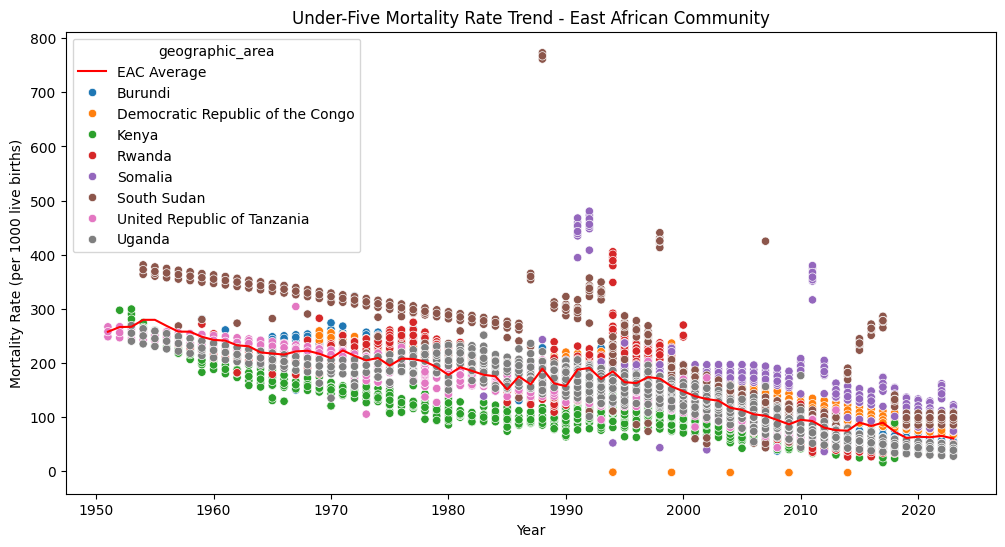

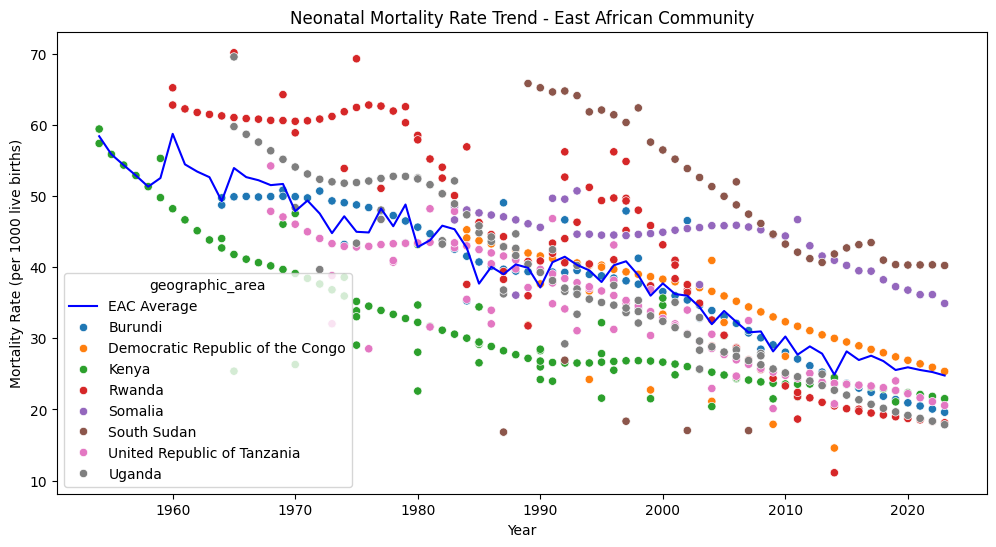

In [405]:
# Filter only Under-five
under5_df = df2[df2['indicator'].str.contains('Under-five mortality rate')]
neonatal_df = df2[df2['indicator'].str.contains('Neonatal mortality rate')]

# Average per year for EAC
avg_under5 = under5_df.groupby('reference_date')['observation_value'].mean().reset_index()
avg_neonatal = neonatal_df.groupby('reference_date')['observation_value'].mean().reset_index()

# Plot Average Under-five mortality
plt.figure(figsize=(12,6))
sns.lineplot(x='reference_date', y='observation_value', data=avg_under5, label='EAC Average', color='red')
sns.scatterplot(x='reference_date', y='observation_value', data=under5_df, hue='geographic_area', palette='tab10',
                legend=True)
plt.title('Under-Five Mortality Rate Trend - East African Community')
plt.ylabel('Mortality Rate (per 1000 live births)')
plt.xlabel('Year')
plt.show()

# Plot Average Neonatal mortality
plt.figure(figsize=(12,6))
sns.lineplot(x='reference_date', y='observation_value', data=avg_neonatal, label='EAC Average', color='blue')
sns.scatterplot(x='reference_date', y='observation_value', data=neonatal_df, hue='geographic_area', palette='tab10',
                legend=True)
plt.title('Neonatal Mortality Rate Trend - East African Community')
plt.ylabel('Mortality Rate (per 1000 live births)')
plt.xlabel('Year')
plt.show()


# Countries in East Africa with the highest under-five mortality rates and highest neonatal mortality rates.

One Country has both the highest rates according to the visuals above. It is **South Sudan**.
In the next code we will confirm by checking the countries with the highest rate of both under 5 and neonatal from the most recent year.

In [406]:
# For Under-five mortality
latest_under5 = latest_indicators_df[latest_indicators_df['indicator'].str.contains('Under-five')]
highest_under5 = latest_under5.sort_values('observation_value', ascending=False).head(1)

# For Neonatal mortality
latest_neonatal = latest_indicators_df[latest_indicators_df['indicator'].str.contains('Neonatal')]
highest_neonatal = latest_neonatal.sort_values('observation_value', ascending=False).head(1)

print("Country with highest Under-five Mortality Rate:", highest_under5[['geographic_area', 'observation_value','reference_date']])
print("\nCountry with highest Neonatal Mortality Rate:", highest_neonatal[['geographic_area', 'observation_value','reference_date']])


Country with highest Under-five Mortality Rate:       geographic_area  observation_value  reference_date
99374     South Sudan         104.313684            2023

Country with highest Neonatal Mortality Rate:       geographic_area  observation_value  reference_date
99212     South Sudan          40.240552            2023


#  Findings on Mortality Rates in East African Community (EAC) Countries

### Under-5 Mortality Rate Trend:
- The average under-five mortality rate across EAC countries **has declined significantly** from **around 1950 onward** through **2020 and beyond**.
- There were **small periods of slight increases**, particularly **between 1990 and 2000**, but overall the trend remained downward.
- In the early years (around 1950), the average under-five mortality rate was **between 200 and 300 deaths per 1,000 live births** (closer to 300).
- By the most recent years after 2020, the rate had **fallen below 100 deaths per 1,000 live births**, showing major progress.

### Neonatal Mortality Rate Trend:
- The average neonatal mortality rate showed **more short-term volatility**, with **ups and downs across the years**.
- Despite the fluctuations, the **long-term trend** (1960–2020) was clearly **downward**.
- The earliest recorded average was **around 60 deaths per 1,000 live births**, while by the latest year (2023), it had **dropped to between 20 and 30 deaths per 1,000 live births**.

### Highest Mortality Rates by Country (2023 data):
- **Country with Highest Under-Five Mortality Rate:**  
  - **South Sudan** with **104.31 deaths per 1,000 live births**.
- **Country with Highest Neonatal Mortality Rate:**  
  - **South Sudan** again with **40.24 deaths per 1,000 live births**.